# The American Sign Language Recognition

*   **What is the American Sign Language?**




American Sign Language (ASL) is a visual language that is used by the deaf and hard-of-hearing community in the United States and some parts of Canada. American Sign Language is used as a means of communication for individuals who are deaf or hard-of-hearing. It enables them to express themselves and understand others in a natural, accessible way. It is also used by hearing individuals who work with the deaf and hard-of-hearing community, such as interpreters, teachers, and support staff. The use of ASL has been shown to have social, emotional, and cognitive benefits, and it is a valuable tool for promoting inclusivity and accessibility in society.

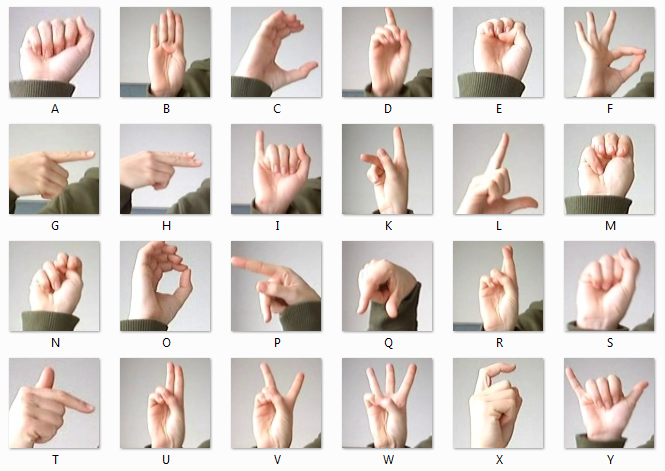

*   **Main goals**




My main goal is to build a machine learning model trained on thousands of images of American Sign Language alphabet signs that can generalize to instances of images of signs never seen by the model. This is because the ultimate goal of this model should be to create a useful model for various types of applications that try to predict the meaning of a letter sign starting from images captured in real-time, allowing us to communicate with deaf or hard-of-hearing individuals.

*   **What will I try to do?**




In this notebook, I explore different types of models to see which one fits better a sample image dataset for the ASL recognition problem taken from Kaggle. I compare the results obtained to choose the model with the best performance that I will later train on a dataset of 14448 ASL signs images built entirely by me.
Considering that we are talking about an image classification task, and since images are composed of pixels, we have a task in which the features of our dataset are the pixels of the images (these latter can be several hundreds or even thousands) leading the models to have very sparse parameters in the space, causing normal Machine Learning models to have poor performance in predicting the correct label of belonging. As a result, it is necessary to use more sophisticated Deep Learning models, particularly neural networks and convolutional neural networks. However, I will also implement an ensemble model, specifically a Random Forest. Since this is a complex problem where the features are many and the parameters are sparse in the space, Clustering turns out to be a very poor estimator, so I have avoided implementing it.

*   **What do I need?**



PySpark is an open-source Python API for Apache Spark, a fast and general-purpose cluster computing system that is used for processing big data. PySpark provides a high-level interface for working with Spark and enables data scientists and engineers to leverage their existing Python skills to interact with Spark data structures and algorithms. PySpark is widely used for data analysis, machine learning, and other data-intensive tasks, making it a powerful tool for data engineers, data scientists, and developers. However, PySpark natively provides APIs to implement only machine learning models. It does not support Deep Learning models such as neural networks or convolutional neural networks. I had to search for frameworks that would also allow me to work with deep learning algorithms. After a deep research of the best framework, I chose to use Horovod.

# What is Horovod? Why is Horovod a good choice? What to install?

Horovod is an open source distributed deep learning framework that is designed to support TensorFlow and PyTorch models. It provides an easy-to-use, scalable and fast solution for distributed deep learning training on multiple GPUs/CPUs and nodes.
Horovod is a good choice for image classification because it offers the following benefits:


1.   Scalability: Horovod allows you to scale your training across multiple GPUs/CPUs and nodes, making it possible to train large-scale models.
2.   Speed: Horovod can significantly speed up training times by distributing the workload among multiple GPUs/CPUs.
3. Easy to use: Horovod is designed to be easy to use and integrate into existing deep learning pipelines.
4. Interoperability: Horovod supports TensorFlow and PyTorch, making it possible to use a variety of models and techniques for image classification.

Overall, Horovod provides a fast, scalable and easy-to-use solution for distributed deep learning training on multiple GPUs/CPUs, making it an ideal choice for image classification tasks.

*   **Dependency installation**



To work with Horovod on Spark using Keras, you need to have the following software installed:

*   **Apache Spark**: A distributed computing framework for big data processing.
*   **Horovod**: A distributed deep learning framework.

*   **Keras**: A high-level neural networks API, written in Python and capable of running on top of TensorFlow.


Additionally, you will need to install the following dependencies:


1.   **TensorFlow**: An open-source software library for dataflow and differentiable programming across a range of tasks.
2. **CMake**: An open-source, cross-platform build system. It is used to control the software compilation process using simple platform and compiler independent configuration files. 

To install the previous packets run the following code snippets.


In [ ]:
!pip install cmake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow==2.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 6.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully u

In [ ]:
!pip install --no-cache-dir horovod[spark]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.0/284.0 KB 268.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 199.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 KB 90.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 176.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=40bcc2694e5d4d102f860dcd398b4d7a0e4a742aa61b53f97dd49d791e498bba
  Stored in directory: /tmp/pip-ephem-wheel-cache-4izbn_vm/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
  Created wheel for horovod: filename=horovod-0.27.0-cp38-cp38-linux_x86_64.whl size=38892476 sha256=f5627a7f7c29ca86aae62e221e8d7

# Steps and downloading datasets from my Google Drive

This notebook will be divided into 2 macro parts. In the first macro area, I will train (using pyspark and horovod) 3 models (a Convolutional Neural Network, a Multilayer Perceptron Classifier, and a Random Forest Classifier (this is an ensemble) on a dataset from Kaggle. In this phase, after training the models on this dataset, I will evaluate their performance on a portion of the dataset not examined during the training. I will finally select the best model. In the second macro area, I will show the main purpose of my project, which is to try to build a model (very similar to the best model trained for the Kaggle dataset) that can recognize in real-time using the video camera on my laptop which ASL alphabet sign is captured in each frame. All of this considering that the model will be trained using images (generated using a particular thresholding technique from OpenCV) from a dataset built entirely by me. The construction of this dataset was necessary for a reason related to the dataset provided by Kaggle. This consists of 28 x 28 (very small) grayscale images and even though I obtained very high values during the evaluation and testing of the trained models, these models were unable to generalize well on instances of real-time captured images. This is probably due to the bias induced by the structure of the images in the dataset itself. In fact, each image in the Kaggle dataset has a background that is more or less the same type. The main challenge in this second phase was to try to find a solution to this problem by building my own dataset with particular image characteristics but still with a size of 28 x 28 to avoid encountering memory problems due to the use of spark on Colab, which offers very limited resources.

In [ ]:
!gdown 1p8KMFcl_mBUmeZHIPAdlnhyVShUYpQJF
!gdown 1CIWi-cifnkhBtQPLIzUm3hFoWjHvDO0m
!mkdir -p /content/dataset
!bunzip2 -d /content/sign_mnist_train.csv.bz2 
!bunzip2 -d /content/sign_mnist_test.csv.bz2
!mv /content/sign_mnist_train.csv /content/dataset
!mv /content/sign_mnist_test.csv /content/dataset

Downloading...
From: https://drive.google.com/uc?id=1p8KMFcl_mBUmeZHIPAdlnhyVShUYpQJF
To: /content/sign_mnist_train.csv.bz2
100% 17.1M/17.1M [00:00<00:00, 38.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CIWi-cifnkhBtQPLIzUm3hFoWjHvDO0m
To: /content/sign_mnist_test.csv.bz2
100% 4.44M/4.44M [00:00<00:00, 96.1MB/s]


In [ ]:
!gdown 1p-BL-IBbFiIzYNAdNTL-Otl8xujZG3we
!bunzip2 -d /content/my_dataset.csv.bz2 
!mv /content/my_dataset.csv /content/dataset

Downloading...
From: https://drive.google.com/uc?id=1p-BL-IBbFiIzYNAdNTL-Otl8xujZG3we
To: /content/my_dataset.csv.bz2
100% 2.73M/2.73M [00:00<00:00, 118MB/s]


# Spark Session initialization 

To initialize a PySpark session, I need to follow these steps:


1.   Start by importing the required library, SparkSession
2.   Create a SparkSession instance
3.   Call the getOrCreate method to start the Spark session. If a Spark session is already active, this method will return the active session.

I can now use the spark object to create dataframes, perform transformations and actions, and manipulate data in PySpark.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Reshape, GlobalAveragePooling2D, Lambda, Conv2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import layers, Input

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml import Pipeline
import pyspark.sql.functions as F
from pyspark.sql.functions import col
from pyspark.ml.linalg import Vector, Vectors, VectorUDT
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder

from pyspark.ml.classification import RandomForestClassifier, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import pyspark.sql.types as T
from pyspark.sql.functions import *
from tensorflow import keras
import tensorflow as tf
import horovod.spark.keras as hvd
from horovod.spark.common.store import Store

from google.colab import files
from keras_preprocessing.image import img_to_array
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
# Set Spark configuration
conf = SparkConf().setAppName('Project').setMaster('local[2]').set('spark.executor.memory', '15G').set('spark.driver.memory', '15G').set("spark.sql.execution.arrow.pyspark.enabled", "true")
sc = SparkContext(conf=conf) #Create Spark Context
spark = SparkSession.builder.getOrCreate() #Ccreate the Spark Session if it does not exist

In [ ]:
spark

#The ASL Dataset and preprocessing

The **Sign Language MNIST dataset** is a replacement for the popular MNIST image dataset of handwritten digits, aimed to provide a more challenging and original benchmark for computer vision and machine learning applications. It consists of hand gestures representing the 24 letters of the American Sign Language (excluding J and Z due to their motion-based gestures) in a format similar to the classic MNIST, with grayscale images of 28x28 pixels. The dataset was created by modifying and expanding a small number of hand gesture images with image processing techniques and filters to increase the quantity and alter the resolution and class separation. This new dataset is expected to provide a new benchmark for modern machine learning methods, and has the potential to improve communication for the deaf and hard-of-hearing through computer vision applications.The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. 
For more information click [the kaggle dataset link.](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)

Data preprocessing refers to the process of cleaning, transforming, and organizing raw data into a format that is suitable for analysis, modeling, and visualization. This process involves several steps, including data cleansing (removing invalid, incomplete, or irrelevant data), data transformation (scaling, normalization, encoding), data integration (combining multiple data sources), and data reduction (eliminating redundant or irrelevant data). The goal of preprocessing is to ensure that the data is accurate, consistent, and in a format that is usable by machine learning algorithms, which in turn helps to improve the results of the analysis and modeling.

The following code snippets refer to Data preprocessing related to the Sign Language MNIST dataset.




In [ ]:
sqlContext = SQLContext(sc) # Creates SQLContext associated to the Spark Context

train_df = sqlContext.read.csv("/content/dataset/sign_mnist_train.csv", sep=',', inferSchema=True, header=True) # Open the train data as a pyspark.sql.dataframe.DataFrame
test_df = sqlContext.read.csv("/content/dataset/sign_mnist_test.csv", sep=',', inferSchema=True, header=True) # Open the test data as a pyspark.sql.dataframe.DataFrame

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [ ]:
train_df.show(10) #Show the first 10 rows of the dataframe

+-----+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---

In [ ]:
train_df.count() # Count the number of instances in the training dataset

27455

In [ ]:
test_df.count() # Count the number of instances in the testing dataset

7172

In [ ]:
df = train_df.union(test_df) # I'm merging the two datasets for convenience

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
df.count() # Count the number of instances in the whole dataset

34627

In [ ]:
df.show(10) 

+-----+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---

In the following code cell, we can see that the classes within the dataset are widely balanced, so there is no need for class balancing.




In [ ]:
instance_for_each_label = df.groupBy("label").count() # Group by label and count the number of instances for each class
instance_for_each_label.show(24) # Show that the classes are balanced

+-----+-----+
|label|count|
+-----+-----+
|   12| 1449|
|   22| 1431|
|    1| 1442|
|   13| 1442|
|    6| 1438|
|   16| 1443|
|    3| 1441|
|   20| 1427|
|    5| 1451|
|   19| 1434|
|   15| 1435|
|   17| 1438|
|    4| 1455|
|    8| 1450|
|   23| 1431|
|    7| 1449|
|   10| 1445|
|   24| 1450|
|   21| 1428|
|   11| 1450|
|   14| 1442|
|    2| 1454|
|    0| 1457|
|   18| 1445|
+-----+-----+



As we can see in the following plot, the classes are perfectly balanced and there are no cases for 9=J or 25=Z labels because they need gesture motions. In fact, during training and testing phases we do not consider these two signs.

<BarContainer object of 24 artists>

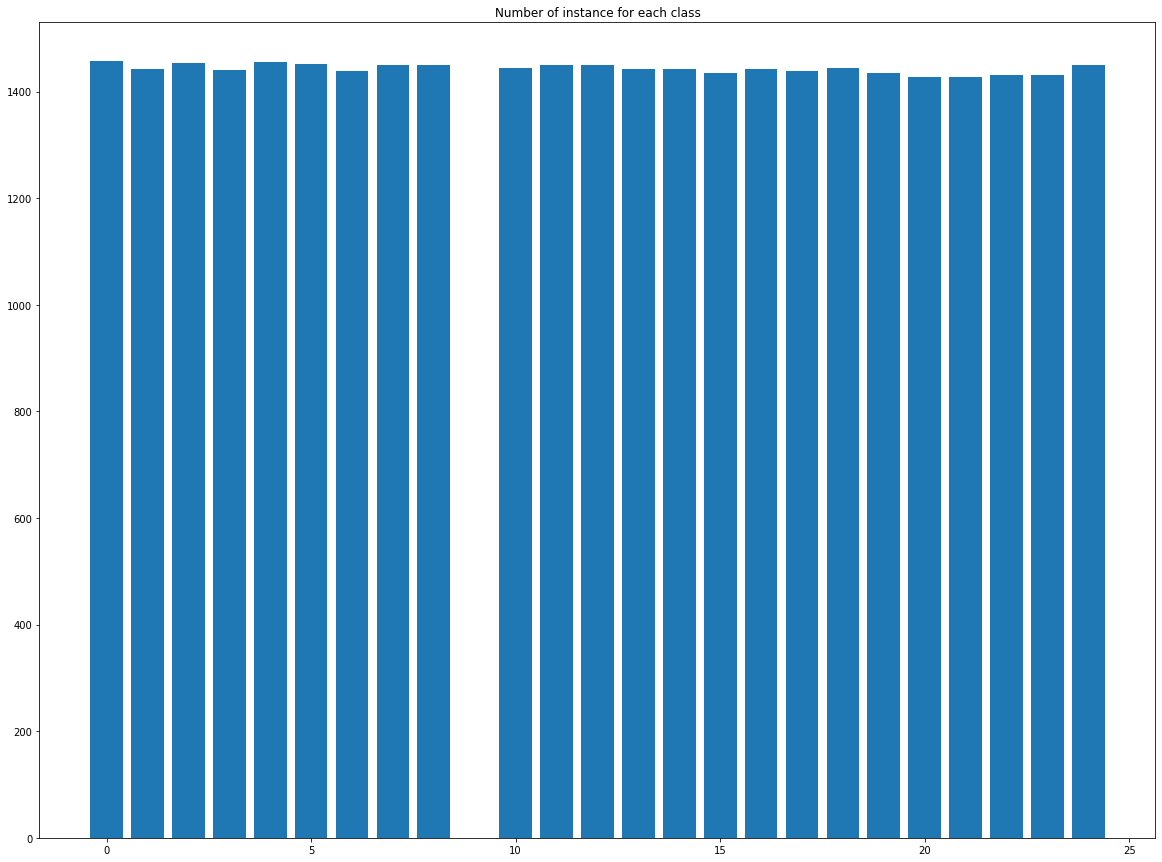

In [ ]:
instance_for_each_label_ordered = instance_for_each_label.sort('label')
instance_for_each_label_pandas = instance_for_each_label_ordered.toPandas()

labels = [label for label in instance_for_each_label_pandas['label'].values]
count = [count for count in instance_for_each_label_pandas['count'].values]
plt.figure(figsize=(20,15))
plt.title("Number of instance for each class")
plt.bar(labels, count)

In [ ]:
features = [x for i, x in enumerate(list(df.columns)) if i != 0] #Compute the list of strings that represent the features of the dataset. 
features

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

# Scaler, VectorAssembler, StringIndexer and OneHotEncoder for CNN

*   **Scaling** an image dataset by dividing each pixel **by 255** is a common normalization technique in computer vision and machine learning. The purpose of this normalization is to ensure that all the pixel values are within a standard range, typically between 0 and 1. This is important because many machine learning algorithms use these pixel values as input features, and having values that are too large or too small can impact their performance. Additionally, normalizing the pixel values can help speed up convergence and improve the stability of the training process. In fact, I chose to divide the pixels of each image by 255 (being 255 the maximum possible value for grayscale images) instead of using Standard Scaler (which normalizes each pixel by first subtracting the mean and then dividing by the standard deviation of the dataframe column where all pixel values related to each image are contained for that particular pixel in that position). This is because Standard Scaler, as calculated, may then generate a slight bias in the models during training due to the structure of the dataset we are going to train. The Standard Scaler could increase the performance of these models for this dataset but they could lose in generalization ability on instances of images with different backgrounds or other different characteristics. That is why I chose to scale the features (pixels) of each image  by dividing by a common value of 255.



In [ ]:
label_and_features = [x for i, x in enumerate(list(df.columns))] #Compute the list of strings that represent the features and the label of the dataset.
df = df.select(*[(col(feature)/255.0).name(feature) if feature != "label" else col(feature).name(feature) for feature in label_and_features]) # Scaling by 255
df.show(10)

+-----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------

*   **VectorAssembler** is a PySpark transformer used to combine a given list of columns into a single vector column.




In [ ]:
assembler = VectorAssembler(inputCols=features, outputCol="scaled_features")
df = assembler.transform(df)
df = df.select(["scaled_features", "label"])
df.show(10)

+--------------------+-----+
|     scaled_features|label|
+--------------------+-----+
|[0.41960784313725...|    3|
|[0.60784313725490...|    6|
|[0.73333333333333...|    2|
|[0.82745098039215...|    2|
|[0.64313725490196...|   13|
|[0.63137254901960...|   16|
|[0.52549019607843...|    8|
|[0.44705882352941...|   22|
|[0.66274509803921...|    3|
|[0.74117647058823...|    3|
+--------------------+-----+
only showing top 10 rows



*   **StringIndexer** is a Spark MLlib utility class for encoding a string column 
of labels to a column of label indices, to prepare the data for machine learning algorithms. The index of each label is determined by its frequency of occurrence in the data. This class maps a string column of labels to an integer column of label indices, with the most frequent label getting index 0.
I chose to transform each label with StringIndexer to be sure each label was a numericasl value 

In [ ]:
string_indexer = StringIndexer(inputCol="label", outputCol="index_label")
fitted_indexer_df = string_indexer.fit(df)
df = fitted_indexer_df.transform(df)

*   **OneHotEncoder** maps a column of category indices to a column of binary vectors, with at most a single one-value per row that indicates the input category index. For example with 5 categories, an input value of 2.0 would map to an output vector of [0.0, 0.0, 1.0, 0.0]. This is used for CNN because it wants a label vector as input when it uses categorical_crossentropy to compute the loss.




In [ ]:
encoder = OneHotEncoder(inputCols=['index_label'], outputCols=['label_vec'], dropLast=False)
enc = encoder.fit(df)
df = enc.transform(df).select('scaled_features', 'label_vec', 'index_label')
df.show(5)

+--------------------+---------------+-----------+
|     scaled_features|      label_vec|index_label|
+--------------------+---------------+-----------+
|[0.41960784313725...|(24,[15],[1.0])|       15.0|
|[0.60784313725490...|(24,[17],[1.0])|       17.0|
|[0.73333333333333...| (24,[2],[1.0])|        2.0|
|[0.82745098039215...| (24,[2],[1.0])|        2.0|
|[0.64313725490196...|(24,[13],[1.0])|       13.0|
+--------------------+---------------+-----------+
only showing top 5 rows



The following function is used to split randomly the dataframe into two separate dataframes: train_df and test_df. The split is performed randomly with a ratio of 80% for train_df and 20% for test_df. The seed argument is used to ensure that the same split is produced every time the function is run with the same seed value. The purpose of splitting the dataframe into the training set and the test set is to use the training set to train the following machine learning models, and the test set to evaluate their performances.

In [ ]:
train_df, test_df = df.randomSplit([0.8, 0.2], seed=42) 

In [ ]:
train_df = train_df.select(["scaled_features", "label_vec", "index_label"])
test_df = test_df.select(["scaled_features", "label_vec", "index_label"])

In [ ]:
train_df.show(10)

+--------------------+---------------+-----------+
|     scaled_features|      label_vec|index_label|
+--------------------+---------------+-----------+
|[0.0,0.0,0.0,0.00...|(24,[18],[1.0])|       18.0|
|[0.0,0.0,0.003921...|(24,[15],[1.0])|       15.0|
|[0.0,0.0,0.133333...| (24,[9],[1.0])|        9.0|
|[0.0,0.0039215686...|(24,[18],[1.0])|       18.0|
|[0.0,0.0117647058...|(24,[21],[1.0])|       21.0|
|[0.0,0.0392156862...| (24,[9],[1.0])|        9.0|
|[0.0,0.0901960784...|(24,[21],[1.0])|       21.0|
|[0.0,0.0980392156...| (24,[9],[1.0])|        9.0|
|[0.0,0.0980392156...|(24,[21],[1.0])|       21.0|
|[0.0,0.0980392156...|(24,[22],[1.0])|       22.0|
+--------------------+---------------+-----------+
only showing top 10 rows



In [ ]:
test_df.show(10)

+--------------------+---------------+-----------+
|     scaled_features|      label_vec|index_label|
+--------------------+---------------+-----------+
|[0.0,0.0,0.074509...|(24,[18],[1.0])|       18.0|
|[0.0,0.0313725490...| (24,[9],[1.0])|        9.0|
|[0.0,0.0862745098...|(24,[22],[1.0])|       22.0|
|[0.0,0.1019607843...| (24,[9],[1.0])|        9.0|
|[0.0,0.1254901960...|(24,[12],[1.0])|       12.0|
|[0.0,0.1450980392...|(24,[12],[1.0])|       12.0|
|[0.01176470588235...|(24,[18],[1.0])|       18.0|
|[0.02745098039215...|(24,[11],[1.0])|       11.0|
|[0.03921568627450...| (24,[9],[1.0])|        9.0|
|[0.04313725490196...| (24,[9],[1.0])|        9.0|
+--------------------+---------------+-----------+
only showing top 10 rows



# Convolutional Neural Network (CNN)

After data preprocessing, our dataset is ready to be used. At this point, we can build different models that will be initially trained on the train_df and then evaluated on the test_df. Let's start with the main model: the Convolutional Neural Network.
A **Convolutional Neural Network (CNN)** is a type of deep learning model that is primarily used for image classification and object recognition tasks. The architecture of a CNN model is designed to automatically and adaptively learn spatial hierarchies of features from input dataset through multiple layers, making it suitable for image data. In Keras, a CNN model is constructed using multiple layers such as Convolutional, Max Pooling, Dropout, and Dense layers. The Convolutional layer is used to learn the local features in an image, the Max Pooling layer is used to down-sample the feature maps and reduce the spatial size, the Dropout layer is used to prevent overfitting by randomly dropping out neurons during training, and the Dense layer is used to make the final prediction based on the learned features.The main advantage of using a CNN model is its ability to learn the relevant features automatically from the data and make predictions based on these learned features. Additionally, the architecture of a CNN model can be easily customized and optimized to achieve improved performance on a specific task. 



In particular, in the following code cells, I have decided to show the training, validation, and testing of the best models selected after a thorough hyperparameter tuning. I performed the hyperparameter tuning following a "try and test" strategy. I chose this strategy because hyperparameter tuning with so many possible cases (as shown at the bottom of the notebook) using, for example, Cross-Validation, would have led to an extreme use of resources in terms of time and, especially, memory. In fact, even doing a cross-validation with very few possible combinations for these models (such as the CNN) on this dataset would immediately result in a memory overflow.

For this reason, I have included several tables at the end of the notebook that show all the hyperparameter tuning performed. Only the best models found were executed in this notebook.

**Convolutional Neural Network (CNN) in detail**



*   The following is my best Convolutional Neural Network (CNN) found with Hyperparameter tuning. The code starts with the definition of the model using the Sequential API, which allows to create a linear stack of layers.

*   The first layer is a Reshape layer which reshapes the input data of shape (784,) into (28, 28, 1), where 28x28 is the image size and 1 represents the number of color channels (grayscale image has only 1 channel).

*   The subsequent layers are Conv2D layers, which are the core building blocks of a CNN. The Conv2D layer performs a 2D convolution operation on the input data, with a specified number of filters (32 in the first layer, 64 in the second layer, and 128 in the third layer). The kernel_size specifies the size of the convolutional filters, which are set to (5,5) in the first two layers and (3,3) in the third layer. The activation function used is 'relu', which stands for rectified linear unit, a commonly used activation function for CNNs.

*   The MaxPooling2D layer performs max pooling operation on the output of the Conv2D layer, with a specified pool_size. Max pooling reduces the spatial size of the data by taking the maximum value from the specified pool_size region, leading to a reduction in the number of parameters and computation in the network, and also helps with translation invariance.

*   The Dropout layer is used to prevent overfitting by randomly setting a fraction of input units to 0 during training.

*   After the Conv2D and MaxPooling2D layers, the data is reshaped using the Flatten layer into a 1D array before passing through a series of Dense layers. The first Dense layer has 128 units and a 'relu' activation function. The Dropout layer with a rate of 0.20 is applied after this layer to prevent overfitting.

*   Finally, the output layer is a Dense layer with 'nb_classes' units, which is the number of classes in the target variable, and a 'softmax' activation function. This layer outputs the predicted probabilities for each class.



In [ ]:
batch_size = 120
nb_classes = 24
epochs = 15

In [ ]:
model = Sequential()
model.add(keras.layers.Reshape((28, 28, 1), input_shape=(784,)))
model.add(keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (5, 5), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.20))
model.add(keras.layers.Dense(nb_classes, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 64)          0

In [ ]:
optimizer = optimizers.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'

In [ ]:
!mkdir -p /content/experiments

store = Store.create(r"/content/experiments")

This following cell code is creating a Horovod (hvd) estimator for distributed training in Keras that allows us to train directly on Spark Dataframe. We can set several parameters for this estimator:


*   **num_proc** specifies the number of processes to run in parallel.
*   **store** is the location of the model file.
*   **model** is the previously defined Keras model.
*   **optimizer** is the optimization algorithm used to update the model weights.
*   **metrics** is a list of metrics to monitor during training and evaluation. It includes 'accuracy', as well as the Precision and Recall metrics.
*   **loss** is the loss function used to evaluate the model performance.
*   **validation** is the percentage of the training data used for validation.
*   **feature_cols** is a list of columns containing the features used for training and prediction.
*   **label_cols** is a list of columns containing the target variable.
*   **batch_size** is the number of samples per gradient update.
*   **epochs** is the number of complete passes over the training data.

Once the hvd.KerasEstimator is defined, it can be used to train, evaluate and make predictions on the data using the fit, evaluate and predict methods respectively. The Horovod library enables data parallel training, which allows the model to be trained faster by using multiple GPUs/CPUsin a cluster.

In [ ]:
keras_estimator = hvd.KerasEstimator(
    num_proc=2,
    store=store,
    model=model,
    optimizer=optimizer,
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()],
    loss=loss,
    validation=0.1,
    feature_cols=['scaled_features'],
    label_cols=['label_vec'],
    batch_size=batch_size,
    epochs=epochs
    )


In [ ]:
keras_model = keras_estimator.fit(train_df).setOutputCols(['prediction']) # Fit the model

num_partitions=20
writing dataframes
train_data_path=file:///content/experiments/intermediate_train_data.0
val_data_path=file:///content/experiments/intermediate_val_data.0
train_partitions=18
val_partitions=2
train_rows=24990
val_rows=2835


/usr/local/lib/python3.8/dist-packages/horovod/spark/common/util.py:495: FutureWarning: 'ParquetDataset.schema' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.schema' attribute instead (which will return an Arrow schema instead of a Parquet schema).
  train_data_schema = train_data.schema.to_arrow_schema()
/usr/local/lib/python3.8/dist-packages/horovod/spark/common/util.py:405: FutureWarning: 'ParquetDataset.pieces' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.fragments' attribute instead.
  for piece in dataset.pieces:
/usr/local/lib/python3.8/dist-packages/horovod/spark/common/util.py:506: FutureWarning: 'ParquetDataset.schema' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_

[1,0]<stdout>:Pinning current process to the GPU.[1,0]<stdout>:


[1,1]<stderr>:2023-02-10 22:32:02.084942: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
[1,0]<stderr>:2023-02-10 22:32:02.085752: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
[1,1]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
[1,1]<stderr>:  self._filesystem = pyarrow.localfs
[1,1]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/etl/dataset_metadata.py:402: FutureWarning: Specifying the 'metadata_nthreads' argument is deprecated as of pyarrow 8.0.0, and the argument will be removed in a future version
[1,1]<stderr>:  dataset = pq.ParquetDataset(path_or_paths, filesystem=fs, validate_schema=False, metadata_nthreads=10)
[1,1]<stderr>:/usr/local/lib/python3.8/dist-packages/pe

[1,0]<stdout>:Shared lib path is pointing to: <CDLL '/usr/local/lib/python3.8/dist-packages/horovod/tensorflow/mpi_lib.cpython-38-x86_64-linux-gnu.so', handle 6fbf380 at 0x7f6fe07c2160>
[1,0]<stdout>:Training parameters: Epochs: 15, Scaled lr: 0.0020000000949949026, Shuffle: True, random_seed: None
[1,0]<stdout>:Train rows: 24990, Train batch size: 120, Train_steps_per_epoch: 105
[1,0]<stdout>:Val rows: 2835, Val batch size: 120, Val_steps_per_epoch: 12
[1,0]<stdout>:Checkpoint file: file:///content/experiments/runs/keras_1676068310, Logs dir: file:///content/experiments/runs/keras_1676068310/logs
[1,0]<stdout>:
[1,0]<stdout>:data_module: <class 'horovod.spark.keras.datamodule.PetastormDataModule'>


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
[1,0]<stderr>:  self._filesystem = pyarrow.localfs
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/etl/dataset_metadata.py:402: FutureWarning: Specifying the 'metadata_nthreads' argument is deprecated as of pyarrow 8.0.0, and the argument will be removed in a future version
[1,0]<stderr>:  dataset = pq.ParquetDataset(path_or_paths, filesystem=fs, validate_schema=False, metadata_nthreads=10)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/etl/dataset_metadata.py:362: FutureWarning: 'ParquetDataset.common_metadata' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version.
[1,0]<stderr>:  if not dataset.common_metadata:
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/reader.py:420: FutureWarning: Specifying the 'metadata_nthreads' argume

[1,0]<stdout>:Epoch 1/15


[1,1]<stderr>:2023-02-10 22:32:18.288334: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
[1,0]<stderr>:2023-02-10 22:32:18.288307: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.


[1,1]<stderr>:2023-02-10 22:32:24.555381: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 58843904 exceeds 10% of free system memory.


[1,0]<stderr>:2023-02-10 22:32:29.588800: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 65467136 exceeds 10% of free system memory.


[1,1]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,1]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)


[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 70s 537ms/step - loss: 2.3411 - accuracy: 0.2672 - precision: 0.6734 - recall: 0.1000 - val_loss: 1.0503 - val_accuracy: 0.6698 - val_precision: 0.8499 - val_recall: 0.3944
[1,0]<stdout>:Epoch 2/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,1]<stderr>:2023-02-10 22:33:18.027681: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 58843904 exceeds 10% of free system memory.


[1,0]<stderr>:2023-02-10 22:33:31.246174: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 65467136 exceeds 10% of free system memory.


[1,1]<stderr>:2023-02-10 22:34:08.810535: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 58843904 exceeds 10% of free system memory.


[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 61s 584ms/step - loss: 0.8357 - accuracy: 0.7133 - precision: 0.8243 - recall: 0.5835 - val_loss: 0.3122 - val_accuracy: 0.9174 - val_precision: 0.9594 - val_recall: 0.8608
[1,0]<stdout>:Epoch 3/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:2023-02-10 22:34:35.743458: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 65467136 exceeds 10% of free system memory.


[1,1]<stderr>:2023-02-10 22:34:59.145614: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 58843904 exceeds 10% of free system memory.


[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 56s 532ms/step - loss: 0.4023 - accuracy: 0.8593 - precision: 0.8984 - recall: 0.8148 - val_loss: 0.1060 - val_accuracy: 0.9868 - val_precision: 0.9901 - val_recall: 0.9715
[1,0]<stdout>:Epoch 4/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:2023-02-10 22:35:33.181473: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 65467136 exceeds 10% of free system memory.


[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 55s 524ms/step - loss: 0.2209 - accuracy: 0.9255 - precision: 0.9428 - recall: 0.9087 - val_loss: 0.0343 - val_accuracy: 0.9990 - val_precision: 1.0000 - val_recall: 0.9986
[1,0]<stdout>:Epoch 5/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 53s 506ms/step - loss: 0.1388 - accuracy: 0.9549 - precision: 0.9623 - recall: 0.9458 - val_loss: 0.0217 - val_accuracy: 0.9990 - val_precision: 0.9997 - val_recall: 0.9990
[1,0]<stdout>:Epoch 6/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 53s 504ms/step - loss: 0.0935 - accuracy: 0.9704 - precision: 0.9746 - recall: 0.9647 - val_loss: 0.0081 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 0.9997
[1,0]<stdout>:Epoch 7/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 54s 514ms/step - loss: 0.0678 - accuracy: 0.9786 - precision: 0.9812 - recall: 0.9751 - val_loss: 0.0042 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 8/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 59s 569ms/step - loss: 0.0564 - accuracy: 0.9822 - precision: 0.9845 - recall: 0.9798 - val_loss: 0.0020 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 9/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 55s 529ms/step - loss: 0.0514 - accuracy: 0.9836 - precision: 0.9857 - recall: 0.9812 - val_loss: 0.0010 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 10/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 55s 529ms/step - loss: 0.0353 - accuracy: 0.9895 - precision: 0.9906 - recall: 0.9881 - val_loss: 0.0013 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 11/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 56s 535ms/step - loss: 0.0334 - accuracy: 0.9896 - precision: 0.9905 - recall: 0.9890 - val_loss: 6.1344e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 12/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 56s 537ms/step - loss: 0.0295 - accuracy: 0.9908 - precision: 0.9916 - recall: 0.9898 - val_loss: 3.4549e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 13/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 49s 469ms/step - loss: 0.0263 - accuracy: 0.9928 - precision: 0.9935 - recall: 0.9921 - val_loss: 5.1403e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 14/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 59s 562ms/step - loss: 0.0261 - accuracy: 0.9920 - precision: 0.9927 - recall: 0.9915 - val_loss: 4.3670e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
[1,0]<stdout>:Epoch 15/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


105/105 [==============================] - 54s 518ms/step - loss: 0.0236 - accuracy: 0.9930 - precision: 0.9937 - recall: 0.9925 - val_loss: 2.5464e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000


In [ ]:
cnn_history = keras_model.getHistory() # Get the metrics hystory

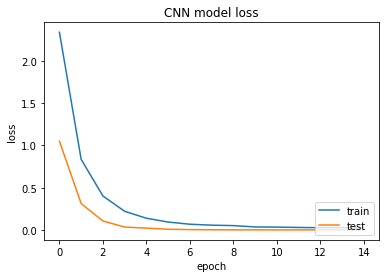

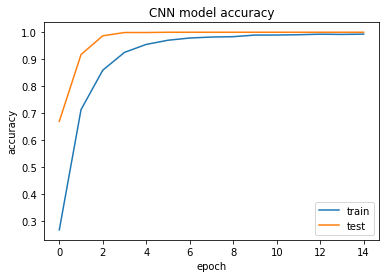

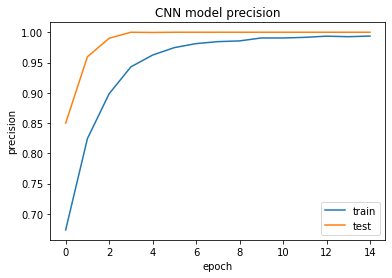

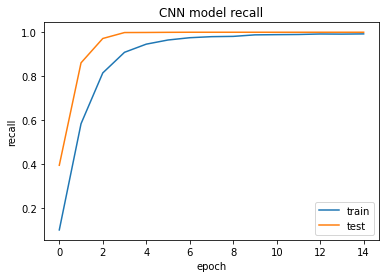

In [ ]:
# This is a function to plot the metrics 
def plot_metrics(history):
  for idx, key in enumerate(history):
    if idx >= 4:
      break 
    val_key = 'val_' + key
    plt.plot(history[key])
    plt.plot(history[val_key])
    plt.title('CNN model ' + key)
    plt.ylabel(key)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()
    print()

plot_metrics(cnn_history)

In [ ]:
k_model = keras_model.getModel() # Extract the model
k_model.save('CNN_kaggle_dataset.h5') # Save the model
#files.download('CNN_kaggle_dataset.h5') # Download the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predict_df = keras_model.transform(test_df) # Transform "test_df" to get the CNN predictions 

In [ ]:
argmax = udf(lambda v: float(np.argmax(v)), returnType=T.DoubleType())
predict_df = predict_df.withColumn('prediction', argmax(predict_df.prediction))
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='index_label', metricName='accuracy') 
print('Test accuracy:', evaluator.evaluate(predict_df)) # Evaluate the model 

Test accuracy: 1.0


In [ ]:
predict_df.show(50)

+--------------------+---------------+-----------+----------+
|     scaled_features|      label_vec|index_label|prediction|
+--------------------+---------------+-----------+----------+
|[0.0,0.0,0.074509...|(24,[18],[1.0])|       18.0|      18.0|
|[0.0,0.0313725490...| (24,[9],[1.0])|        9.0|       9.0|
|[0.0,0.0862745098...|(24,[22],[1.0])|       22.0|      22.0|
|[0.0,0.1019607843...| (24,[9],[1.0])|        9.0|       9.0|
|[0.0,0.1254901960...|(24,[12],[1.0])|       12.0|      12.0|
|[0.0,0.1450980392...|(24,[12],[1.0])|       12.0|      12.0|
|[0.01176470588235...|(24,[18],[1.0])|       18.0|      18.0|
|[0.02745098039215...|(24,[11],[1.0])|       11.0|      11.0|
|[0.03921568627450...| (24,[9],[1.0])|        9.0|       9.0|
|[0.04313725490196...| (24,[9],[1.0])|        9.0|       9.0|
|[0.04313725490196...|(24,[11],[1.0])|       11.0|      11.0|
|[0.04313725490196...|(24,[12],[1.0])|       12.0|      12.0|
|[0.04705882352941...|(24,[21],[1.0])|       21.0|      21.0|
|[0.0509

Below there is instead the Confusion Matrix for the CNN.
In machine learning and specifically in the context of Spark, a confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted class labels to the true class labels and gives a summary of the model's performance. The matrix consists of four parts: True Positives (TP), False Positives (FP), False Negatives (FN), and True Negatives (TN).

True Positives (TP) are the cases where the model correctly predicts the positive class.
False Positives (FP) are the cases where the model predicts the positive class, but the true label is negative.
False Negatives (FN) are the cases where the model predicts the negative class, but the true label is positive.
True Negatives (TN) are the cases where the model correctly predicts the negative class.

/usr/local/lib/python3.8/dist-packages/pyspark/sql/context.py:157: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


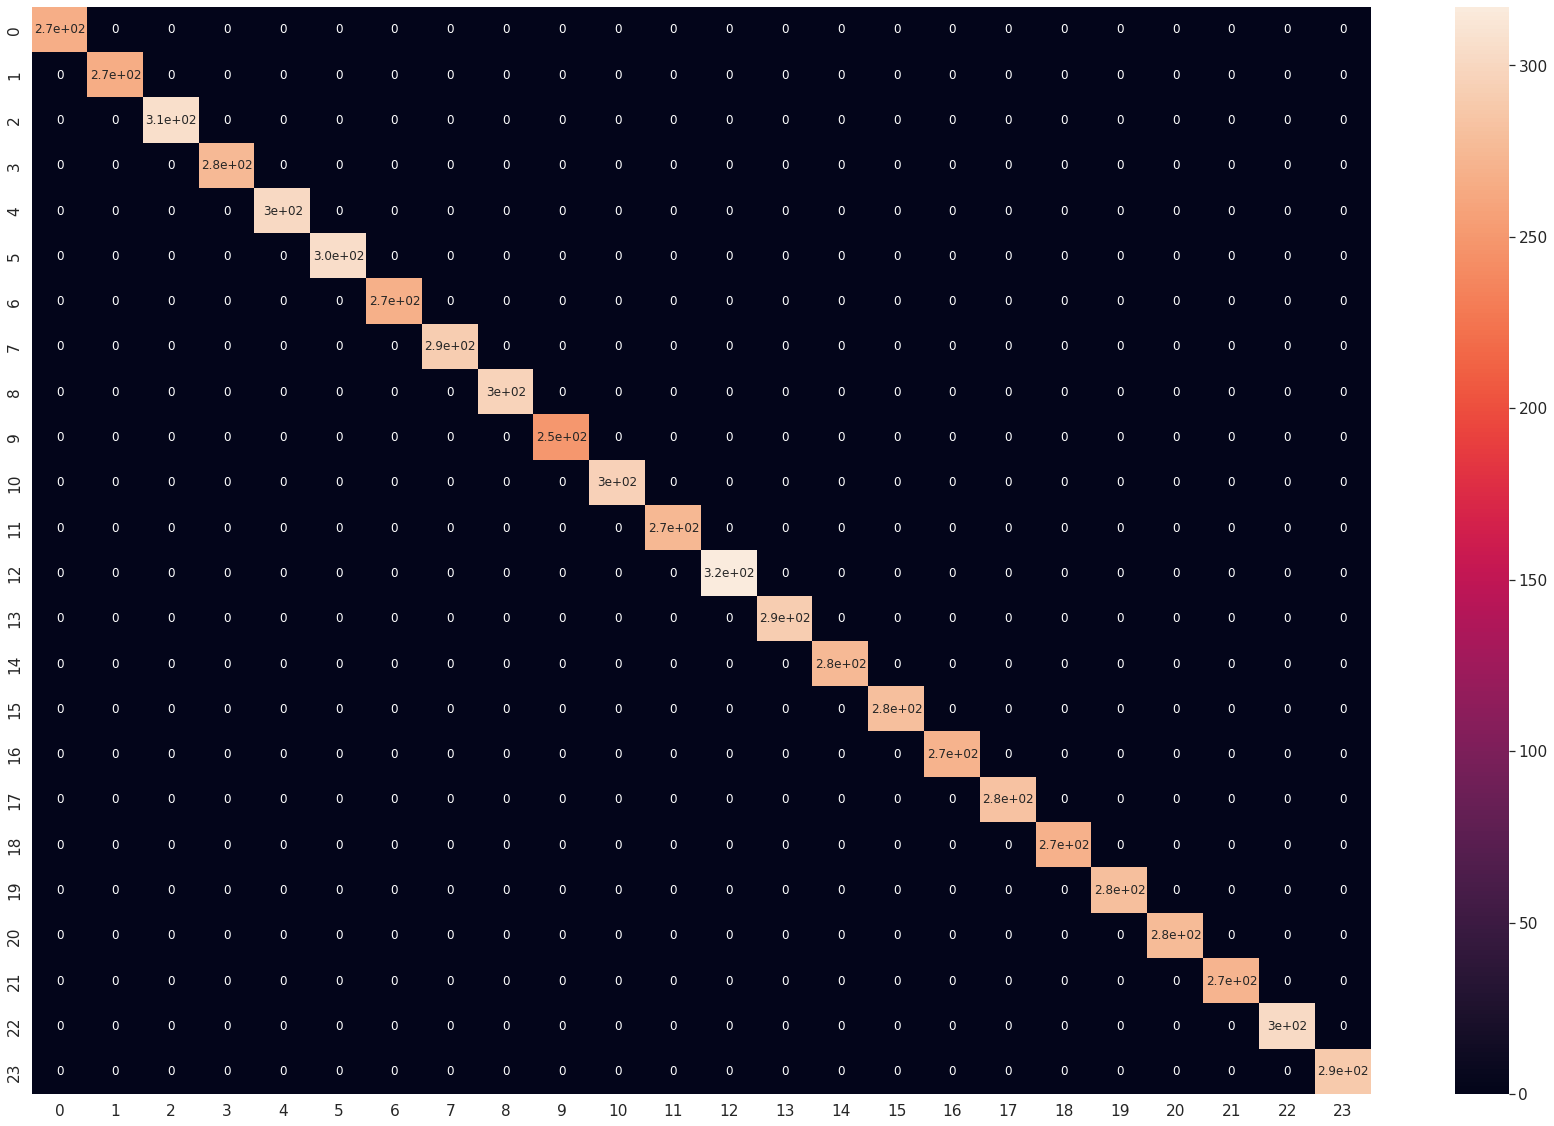

In [ ]:
df_for_confusion_matrix = predict_df.select(["index_label", "prediction"]) # Sample dataset with true labels and predicted labels
metrics = MulticlassMetrics(df_for_confusion_matrix.rdd) # Create MulticlassMetrics instance
cm = metrics.confusionMatrix().toArray() # Compute confusion matrix
df_cm = pd.DataFrame(cm, range(24), range(24))
plt.figure(figsize=(30,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show() # Plot the confusion matrix

# Random Forest Classifier (RF)

"Although, for an image classification task, the Convolutional Neural Network probably results as the best performing model, it is necessary to verify this by training and evaluating other models as well. A Random Forest Classifier has been trained below."

An ensemble is a combination of multiple models, where the final output is based on the combined predictions of these models. The idea behind using an ensemble is to leverage the strengths of individual models and reduce their weaknesses, resulting in a more robust and accurate overall prediction.

**Random Forest Classifier** is a type of ensemble machine learning algorithm that uses a collection of decision trees to make predictions. In PySpark, the Random Forest Classifier is implemented as a library in the MLlib package, and it can be used for both binary and multi-class classification tasks. The algorithm operates by training many decision trees on random subsets of the data, and then combining their predictions by taking the average (for regression) or by voting (for classification).


In [ ]:
rf = RandomForestClassifier(labelCol="index_label", featuresCol="scaled_features", numTrees=20, maxDepth=6, featureSubsetStrategy='auto', seed = 42) # Initialize the Random Forest Classifier
rf_model = rf.fit(train_df) # The fit method starts the training of the Random Forest (RF)

In [ ]:
pred_rf_test_df = rf_model.transform(test_df) # Transform "test_df" to get the RF predictions 

In [ ]:
pred_rf_test_df.show(50)

+--------------------+---------------+-----------+--------------------+--------------------+----------+
|     scaled_features|      label_vec|index_label|       rawPrediction|         probability|prediction|
+--------------------+---------------+-----------+--------------------+--------------------+----------+
|[0.0,0.0,0.074509...|(24,[18],[1.0])|       18.0|[0.08224612228275...|[0.00411230611413...|      18.0|
|[0.0,0.0313725490...| (24,[9],[1.0])|        9.0|[0.07091687655947...|[0.00354584382797...|       9.0|
|[0.0,0.0862745098...|(24,[22],[1.0])|       22.0|[0.17573664818548...|[0.00878683240927...|       9.0|
|[0.0,0.1019607843...| (24,[9],[1.0])|        9.0|[0.58633551135177...|[0.02931677556758...|       9.0|
|[0.0,0.1254901960...|(24,[12],[1.0])|       12.0|[0.36574306490370...|[0.01828715324518...|      18.0|
|[0.0,0.1450980392...|(24,[12],[1.0])|       12.0|[0.11664907713047...|[0.00583245385652...|      12.0|
|[0.01176470588235...|(24,[18],[1.0])|       18.0|[0.01694900858

In [ ]:
pred_rf_train_df = rf_model.transform(train_df) # Transform the train_df to also evaluate the train_df
evaluator = MulticlassClassificationEvaluator(labelCol="index_label", predictionCol = "prediction") # Initialize a MulticlassClassificationEvaluator
rf_test_acc = evaluator.evaluate(pred_rf_test_df, {evaluator.metricName: "accuracy"})
rf_train_acc = evaluator.evaluate(pred_rf_train_df, {evaluator.metricName: "accuracy"})
rf_test_recall = evaluator.evaluate(pred_rf_test_df, {evaluator.metricName: "weightedRecall"})
rf_train_recall = evaluator.evaluate(pred_rf_train_df, {evaluator.metricName: "weightedRecall"})
rf_test_precision = evaluator.evaluate(pred_rf_test_df, {evaluator.metricName: "weightedPrecision"})
rf_train_precision = evaluator.evaluate(pred_rf_train_df, {evaluator.metricName: "weightedPrecision"})
print('Train accuracy:', rf_train_acc) # Evaluate the RF and show the train accuracy
print('Test accuracy:', rf_test_acc) # Evaluate the RF and show the test accuracy
print('Train recall:', rf_train_recall) # Evaluate the RF and show the train recall
print('Test recall:', rf_test_recall) # Evaluate the RF and show the test recall
print('Train precision:', rf_train_recall) # Evaluate the RF and show the train precision
print('Test precision:', rf_test_recall) # Evaluate the RF and show the test precision

Train accuracy: 0.6573225516621743
Test accuracy: 0.6427521317259629
Train recall: 0.6573225516621742
Test recall: 0.642752131725963
Train precision: 0.6573225516621742
Test precision: 0.642752131725963


In the following row the confusion matrix related to the Random Forest is shown.

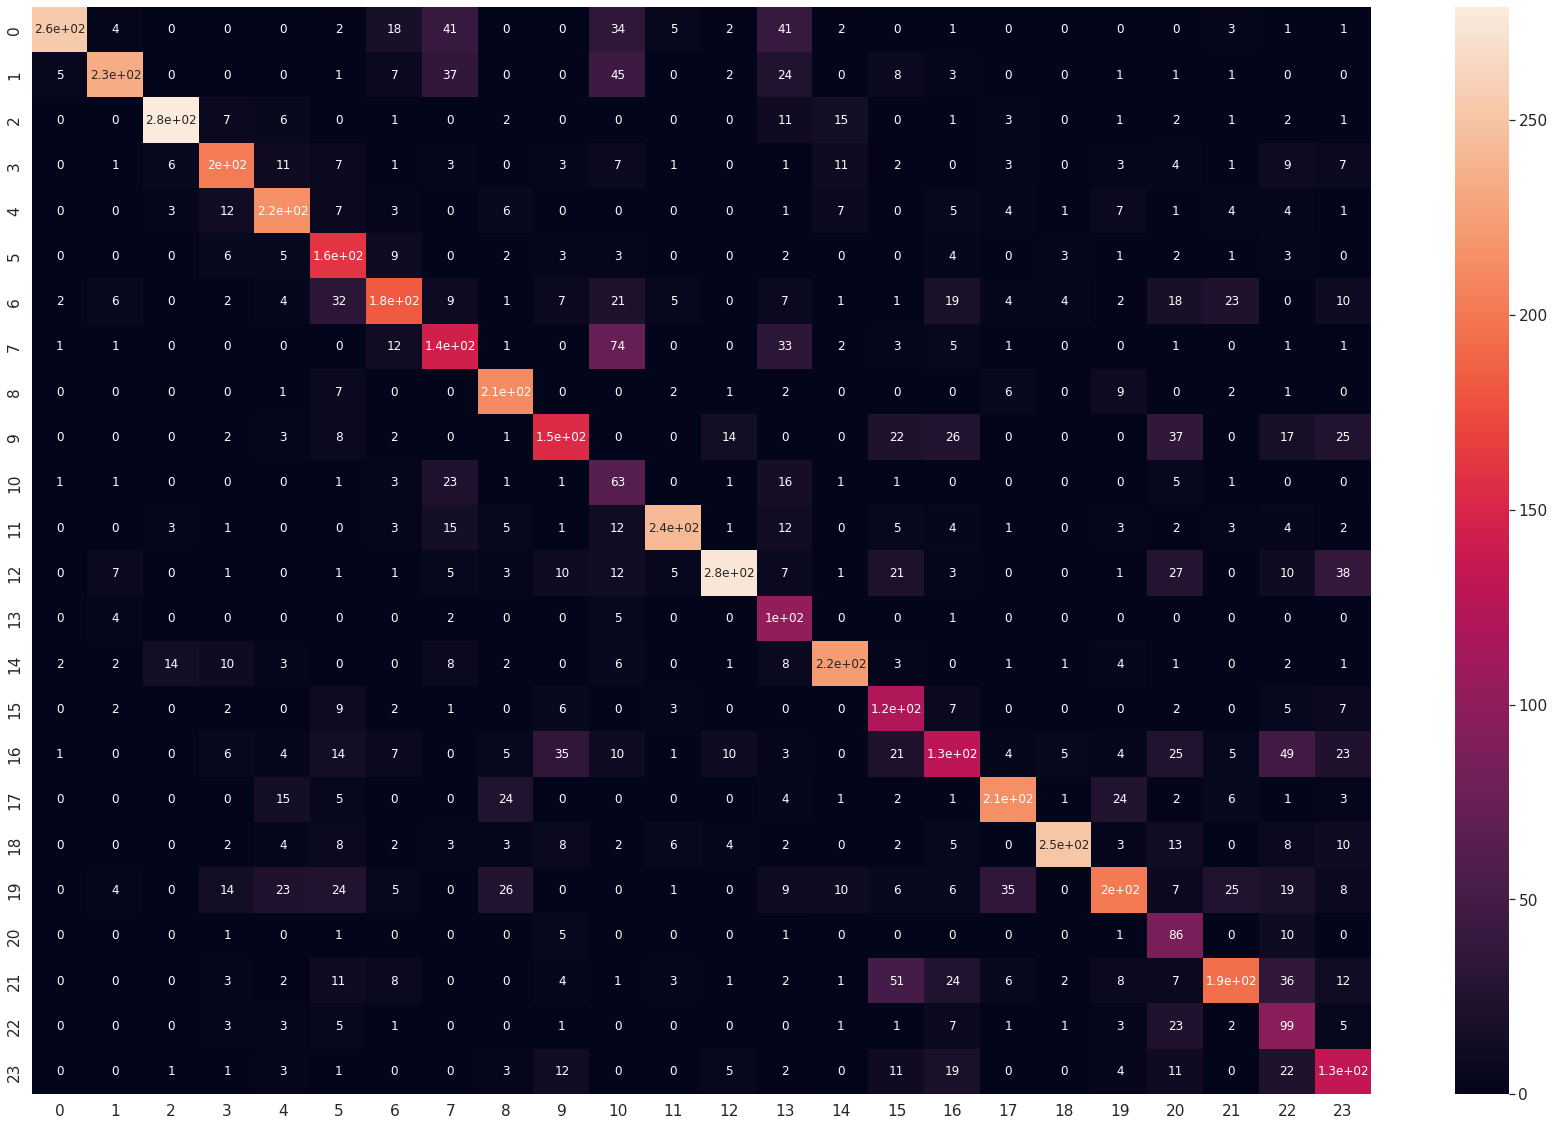

In [ ]:
df_for_confusion_matrix = pred_rf_test_df.select(["index_label", "prediction"]) # Sample dataset with true labels and predicted labels
metrics = MulticlassMetrics(df_for_confusion_matrix.rdd) # Create MulticlassMetrics instance
cm = metrics.confusionMatrix().toArray() # Compute confusion matrix
df_cm = pd.DataFrame(cm, range(24), range(24))
plt.figure(figsize=(30,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show() # Plot the confusion matrix

As shown by the results obtained after training, a simple ensemble model like the Random Forest Classifier tends to not perform satisfactorily in terms of prediction accuracy. This is clearly due to the fact that, while a CNN learns to recognize patterns that repeat in every image and from these it learns to generalize to instances never seen, in a simple RF this does not happen because it considers each of the features (the set of all pixels in the image) as completely separate and distinct entities, differently from CNNs where, thanks to the use of different kernels (filters), values of recurrently close pixels will have a different value and weight compared to the same values of pixels that are located in a different location in the image.

# Multilayer Perceptron Classifier (MLP) vs Convolutional Neural Network (CNN)

A **Multilayer Perceptron Classifier** is a type of artificial neural network used for supervised learning tasks such as classification. It consists of multiple interconnected processing units or "neurons" arranged in layers. The input layer receives data and passes it through hidden layers for processing, and the output layer provides the predicted class label for the input data. The connections between neurons are assigned weights that are updated during the learning process based on the error between the predicted and actual output. The Multilayer Perceptron Classifier is used in various applications such as image recognition, speech recognition, and natural language processing.

Like the Convolutional Neural Network, the Multilayer Perceptron Classifier is a neural network. However, the MLP works differently from a CNN. While the CNN is typically trained to solve image classification tasks, the MLP is more general and is not specific to working with images.

**Convolutional Neural Networ**k is preferred for image classification over Multilayer Perceptron Classifier because of the following reasons:

1. **Feature extraction:** CNNs are equipped with convolutional layers, which help in extracting meaningful features from the input image. This is important as images contain a lot of redundant information that can confuse the model.

2. **Spatial invariance:** CNNs are capable of handling translations, rotations and other variations in an image by using pooling layers. This allows the network to generalize better and perform well on unseen images.

3. **Computational efficiency:** CNNs use convolutional layers, which are computationally efficient and share weights. This reduces the number of parameters that need to be trained, making the model faster to train.

4. **Better performance:** In practice, CNNs have shown better performance in image classification tasks when compared to MLP classifiers. This is because CNNs are specifically designed to handle image data and can better capture the spatial relationships between pixels in an image.

However, the best MLP obtained after Hyperparameter tuning is shown below.

In [ ]:
train = train_df.withColumnRenamed("scaled_features","features").withColumnRenamed("index_label","label") # Rename the column "scaled_features" of train_df in "features" because MLP wants a column named "features"
test = test_df.withColumnRenamed("scaled_features","features").withColumnRenamed("index_label","label") # # Rename the column "scaled_features" of test_df in "features" because MLP wants a column named "features"

In [ ]:
layers = [784, 40, 30, 24]
mlp = MultilayerPerceptronClassifier(maxIter=100, layers=layers, seed=1234) # Initialize Multilayer Perceptron Classifier (RF)
mlp_model = mlp.fit(train) # The fit method starts the training of the Multilayer Perceptron Classifier (RF)

In [ ]:
mlp_pred_test_df = mlp_model.transform(test)  # Transform "test" to get the RF predictions 

In [ ]:
mlp_pred_test_df.show(20)

+--------------------+---------------+-----+--------------------+--------------------+----------+
|            features|      label_vec|label|       rawPrediction|         probability|prediction|
+--------------------+---------------+-----+--------------------+--------------------+----------+
|[0.0,0.0,0.074509...|(24,[18],[1.0])| 18.0|[-20.759051654587...|[5.59071350518531...|      20.0|
|[0.0,0.0313725490...| (24,[9],[1.0])|  9.0|[-6.3241997231403...|[1.18056735776954...|       9.0|
|[0.0,0.0862745098...|(24,[22],[1.0])| 22.0|[-9.6963484383836...|[4.51028781203860...|      16.0|
|[0.0,0.1019607843...| (24,[9],[1.0])|  9.0|[-7.3858295447938...|[1.00743943618738...|       9.0|
|[0.0,0.1254901960...|(24,[12],[1.0])| 12.0|[-14.276032926347...|[1.05554290742717...|      12.0|
|[0.0,0.1450980392...|(24,[12],[1.0])| 12.0|[-14.264754387289...|[1.07358477326699...|      12.0|
|[0.01176470588235...|(24,[18],[1.0])| 18.0|[-14.294548591214...|[3.63686585511637...|      18.0|
|[0.02745098039215..

In [ ]:
mlp_pred_train_df = mlp_model.transform(train)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol = "prediction")
mlp_test_acc = evaluator.evaluate(mlp_pred_test_df, {evaluator.metricName: "accuracy"})
mlp_train_acc = evaluator.evaluate(mlp_pred_train_df, {evaluator.metricName: "accuracy"})
mlp_test_recall = evaluator.evaluate(mlp_pred_test_df, {evaluator.metricName: "weightedRecall"})
mlp_train_recall = evaluator.evaluate(mlp_pred_train_df, {evaluator.metricName: "weightedRecall"})
mlp_test_precision = evaluator.evaluate(mlp_pred_test_df, {evaluator.metricName: "weightedPrecision"})
mlp_train_precision = evaluator.evaluate(mlp_pred_train_df, {evaluator.metricName: "weightedPrecision"})
print('Train accuracy:', mlp_train_acc)
print('Test accuracy:', mlp_test_acc)
print('Train recall:', mlp_train_recall)
print('Test recall:', mlp_test_recall)
print('Train precision:', mlp_train_recall)
print('Test precision:', mlp_test_recall)

Train accuracy: 0.7142138364779874
Test accuracy: 0.7089091443693032
Train recall: 0.7142138364779875
Test recall: 0.708909144369303
Train precision: 0.7142138364779875
Test precision: 0.708909144369303


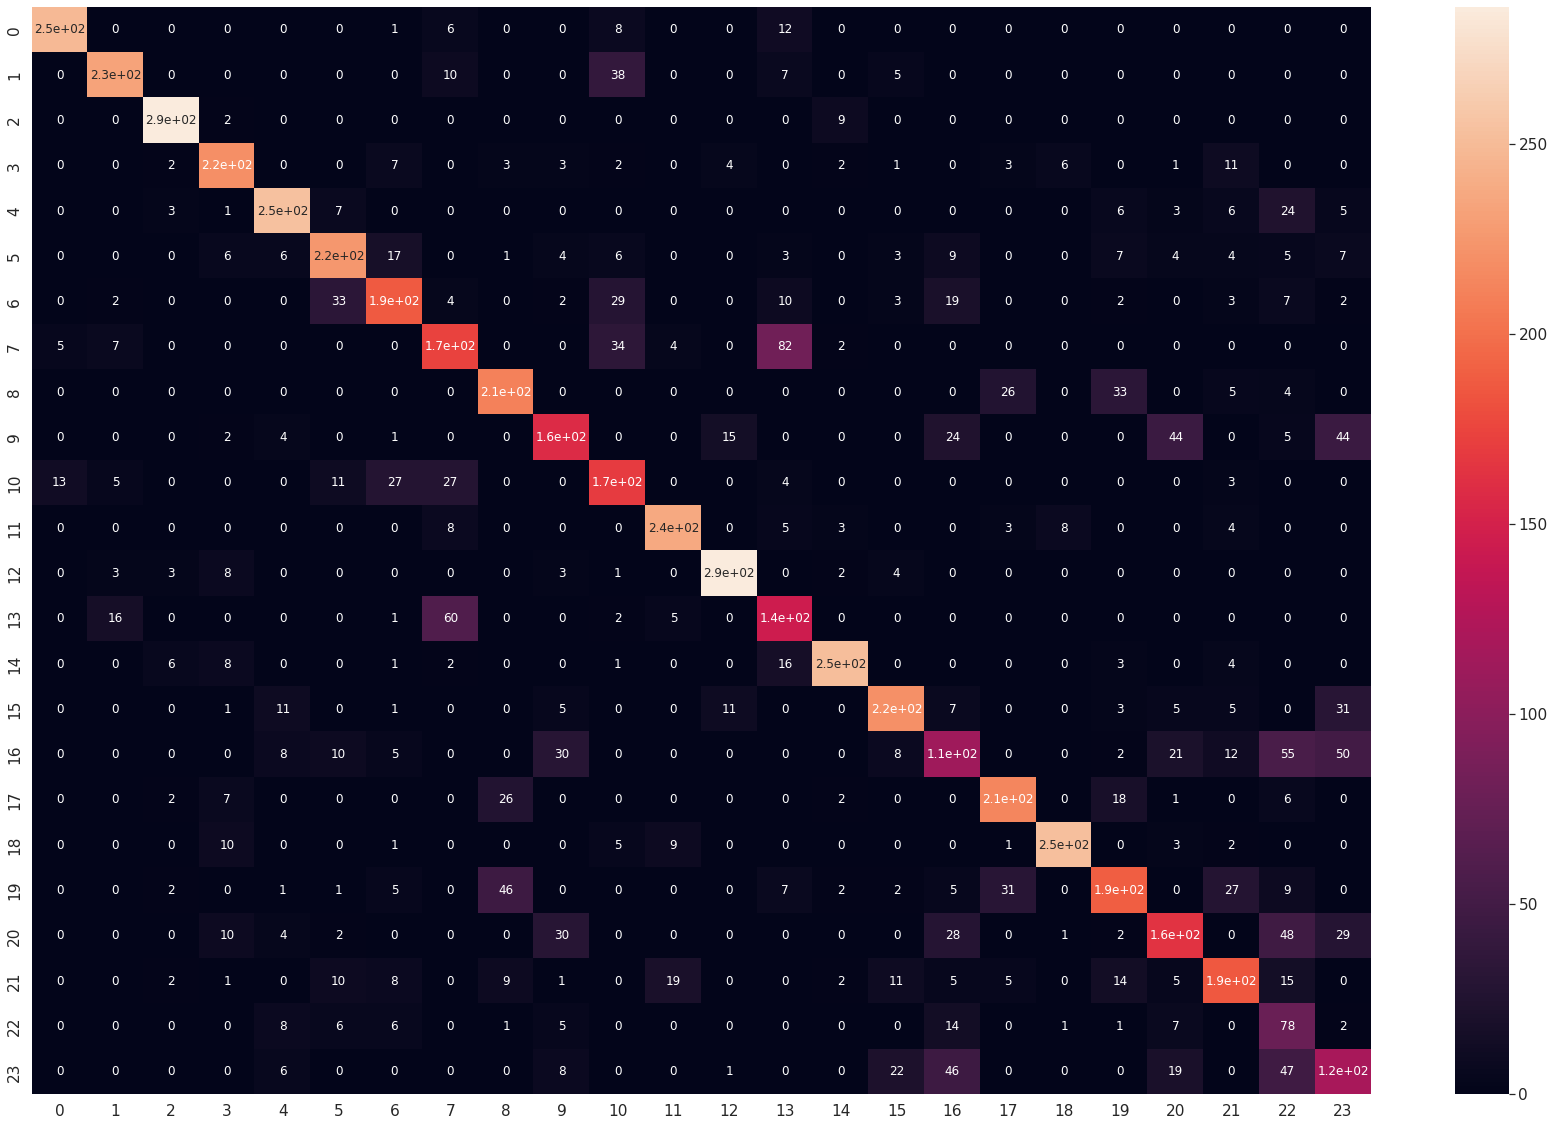

In [ ]:
df_for_confusion_matrix = mlp_pred_test_df.select(["label", "prediction"]) # Sample dataset with true labels and predicted labels
metrics = MulticlassMetrics(df_for_confusion_matrix.rdd) # Create MulticlassMetrics instance
cm = metrics.confusionMatrix().toArray() # Compute confusion matrix
df_cm = pd.DataFrame(cm, range(24), range(24))
plt.figure(figsize=(30,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show() # Plot the confusion matrix

As can be seen, the MLP achieves lower performance compared to the CNN. Furthermore, it is visible that compared to the overtrained CNN, the Multilayer Perceptron Classifier tends to overfit (the accuracy on the train is higher than the accuracy on the test), meaning that the model is more inclined to learn the data, leading it to not generalize well on new instances.

# My dataframe for Real Time recognition

At this point, after training the aforementioned models, I have come to the realization that the CNN is actually the model that performs best. The trained Convolutional Neural Network, in fact, reaches very high performance on the Kaggle dataset without overfitting (in fact, even if in the training phase it gets an accuracy of 0.98, in the testing phase it is even better reaching values of 0.999). However, even though I can achieve such high performance on this dataset, as soon as I use the trained model (on this dataset) to predict the classes of belonging for the new images captured in real time from my laptop's camera, the results are fairly mediocre. This is probably due to the fact that the images inserted in the dataset were sampled using different augmentation techniques and with particular contexts unknown to us, which are probably not similar to those that can be captured in a real-time context. And that's why I decided to build my own completely hand-made dataset using only my laptop's camera.

**How did I build my dataset? Why in this way?**




What's the idea? To try to avoid the problem of having a model that doesn't generalize well to instances that are completely different from those the model was trained on, I decided to build an image dataset by sampling images using an OpenCV library algorithm called thresholding that allows us to highlight only the elements in the image with a particular shade of color.

Specifically, I built the images using a Color thresholding technique released by OpenCV.


**Color thresholding** is a technique used in image processing to segment an image based on color. The idea is to convert the image into a binary image where pixels are either black or white, depending on whether they fall within a specified range of color values or not. The process of color thresholding involves defining a range of color values that correspond to the desired object in the image, and then setting all pixels outside of that range to black, while keeping the pixels within the range white. This creates a binary image that separates the desired object from the background.

I used this preprocessing technique to extract images from the frames captured by my laptop's camera, in which the hand representing one of the 24 signs of the ASL alphabet is completely white, and anything that is not a similar color to the hand is turned black. In this way, by training my Convolutional Neural Network with these images, I will avoid the problem of bias due to the background of the images in the dataset. This is because in the testing phase I will apply the same thresholding filter to each frame captured by the camera, making it much more similar to the images in the dataset with which I trained my model. After the filter is applied, I will crop the images to a size of 28 x 28 and scale each image by dividing the pixels by the maximum value of 255. Only after this preprocessing I will evaluate the model in real-time on the image captured in the current frame.

So I collected 603 28 x 28 grayscale images (using the above described technique) for each letter-sign of the ASL alphabet (24 classes with 603 images each). The images were generated by framing (with the camera on my laptop) my hand or the hands of some of my friends/relatives in a rectangular box built with OpenCV. Once the images were generated, I then converted them with a small Python program into the most readable and lightweight csv format. At this point, my dataset is in a format identical to the dataset taken from Kaggle.

In the following code lines, I applied the same preprocessing and tecniques used for the Kaggle dataset and for the training and evaluation of the CNN model.

In [ ]:
my_dataframe = sqlContext.read.csv("/content/dataset/my_dataset.csv", sep=',', inferSchema=True, header=True) # Open the data as a pyspark.sql.dataframe.DataFrame

In [ ]:
my_dataframe.show(10) # Show the first 10 rows of my dataframe

+-----+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+--------+---

In [ ]:
my_dataframe.count() # Count the number of instances in the whole dataset

14472

In [ ]:
instance_for_each_label = my_dataframe.groupBy("label").count() # Group by label and count the number of instances for each class
instance_for_each_label.show(24) # Show that the classes are balanced

+-----+-----+
|label|count|
+-----+-----+
|   12|  603|
|    1|  603|
|   13|  603|
|    6|  603|
|    3|  603|
|    5|  603|
|    9|  603|
|    4|  603|
|    8|  603|
|    7|  603|
|   10|  603|
|   11|  603|
|    2|  603|
|    0|  603|
|   22|  603|
|   16|  603|
|   20|  603|
|   19|  603|
|   15|  603|
|   17|  603|
|   23|  603|
|   21|  603|
|   14|  603|
|   18|  603|
+-----+-----+



# Preprocessing

In [ ]:
my_dataframe = my_dataframe.select(*[(col(feature)/255.0).name(feature) if feature != "label" else col(feature).name(feature) for feature in label_and_features]) # Scale pixels by 255

In [ ]:
my_dataframe.show(10) # Show the first 10 rows of my dataframe after scaling

+-----+-------------------+-------------------+--------------------+-------------------+-------------------+-------------------+--------------------+-------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+-------------------+-------------------+-------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+--------------------+-------------------+--------------------+-------------------+-------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------

In [ ]:
my_df_assembler = VectorAssembler(inputCols=features, outputCol="scaled_features") # Initialize VectorAssembler
my_dataframe = my_df_assembler.transform(my_dataframe) # Apply VectorAssembler
my_dataframe = my_dataframe.select(["scaled_features", "label"])

In [ ]:
my_dataframe.select(['scaled_features']).show(10, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
my_df_string_indexer = StringIndexer(inputCol="label", outputCol="index_label") # Initialize StringIndexer
my_df_fitted_indexer = my_df_string_indexer.fit(my_dataframe) # Apply StringIndexer
my_df_indexed = my_df_fitted_indexer.transform(my_dataframe)
my_df = my_df_indexed

In [ ]:
# Compute how the original labels are mapped after applying the StringIndexer. It will be useful later during real-time application.
labels_mapping_for_application = my_df.select(['label', 'index_label'])
labels_mapping_for_application = labels_mapping_for_application.distinct()
labels_mapping_for_application.sort('label').show(24)

+-----+-----------+
|label|index_label|
+-----+-----------+
|    0|        0.0|
|    1|        1.0|
|    2|       12.0|
|    3|       17.0|
|    4|       18.0|
|    5|       19.0|
|    6|       20.0|
|    7|       21.0|
|    8|       22.0|
|    9|       23.0|
|   10|        2.0|
|   11|        3.0|
|   12|        4.0|
|   13|        5.0|
|   14|        6.0|
|   15|        7.0|
|   16|        8.0|
|   17|        9.0|
|   18|       10.0|
|   19|       11.0|
|   20|       13.0|
|   21|       14.0|
|   22|       15.0|
|   23|       16.0|
+-----+-----------+



In [ ]:
my_df_encoder = OneHotEncoder(inputCols=['index_label'], outputCols=['label_vec'], dropLast=False) # Initialize OneHotEncoder
my_df_fitted_enc = my_df_encoder.fit(my_df) # Apply OneHotEncoder
my_df = my_df_fitted_enc.transform(my_df).select('scaled_features', 'label_vec', 'index_label')
my_df.show(5)

+--------------------+--------------+-----------+
|     scaled_features|     label_vec|index_label|
+--------------------+--------------+-----------+
|(784,[2,4,7,10,13...|(24,[0],[1.0])|        0.0|
|(784,[4,5,10,12,1...|(24,[0],[1.0])|        0.0|
|(784,[8,12,15,16,...|(24,[0],[1.0])|        0.0|
|(784,[3,10,12,15,...|(24,[0],[1.0])|        0.0|
|(784,[2,6,9,10,13...|(24,[0],[1.0])|        0.0|
+--------------------+--------------+-----------+
only showing top 5 rows



In [ ]:
my_train_df, my_test_df = my_df.randomSplit([0.8, 0.2], seed=42) # Randomly split my dataframe into two parts: 80% of the images for the training set and 20% for the test set.

In [ ]:
my_train_df = my_train_df.select(["scaled_features", "label_vec", "index_label"])
my_test_df = my_test_df.select(["scaled_features", "label_vec", "index_label"])

In [ ]:
my_train_df.show(10)

+--------------------+---------------+-----------+
|     scaled_features|      label_vec|index_label|
+--------------------+---------------+-----------+
|(784,[0,1,2,3,8,1...|(24,[12],[1.0])|       12.0|
|(784,[0,1,2,4,7,8...| (24,[0],[1.0])|        0.0|
|(784,[0,1,2,4,8,1...|(24,[17],[1.0])|       17.0|
|(784,[0,1,2,5,6,1...| (24,[0],[1.0])|        0.0|
|(784,[0,1,2,5,7,1...| (24,[3],[1.0])|        3.0|
|(784,[0,1,3,4,6,8...| (24,[1],[1.0])|        1.0|
|(784,[0,1,3,4,6,9...|(24,[21],[1.0])|       21.0|
|(784,[0,1,3,4,6,1...|(24,[21],[1.0])|       21.0|
|(784,[0,1,3,4,8,9...|(24,[19],[1.0])|       19.0|
|(784,[0,1,3,4,8,1...|(24,[19],[1.0])|       19.0|
+--------------------+---------------+-----------+
only showing top 10 rows



# Train the Convolutional Neural Network (CNN)

In [ ]:
my_df_model = Sequential()
my_df_model.add(keras.layers.Reshape((28, 28, 1), input_shape=(784,)))
my_df_model.add(keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu'))
my_df_model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

my_df_model.add(keras.layers.Conv2D(64, kernel_size = (5, 5), activation = 'relu'))
my_df_model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
my_df_model.add(keras.layers.Dropout(0.20))

my_df_model.add(keras.layers.Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
my_df_model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))
my_df_model.add(keras.layers.Dropout(0.20))

my_df_model.add(keras.layers.Flatten())
my_df_model.add(keras.layers.Dense(128, activation = 'relu'))
my_df_model.add(keras.layers.Dropout(0.20))
my_df_model.add(keras.layers.Dense(nb_classes, activation = 'softmax'))

In [ ]:
my_df_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 4, 4, 64)         

In [ ]:
my_df_optimizer = optimizers.Adam(learning_rate=0.001)
my_df_loss = 'categorical_crossentropy'

In [ ]:
!mkdir -p /content/my_df_experiments

my_df_store = Store.create(r"/content/my_df_experiments")

In [ ]:
my_df_keras_estimator = hvd.KerasEstimator(
    num_proc=2,
    store=my_df_store,
    model=my_df_model,
    optimizer=my_df_optimizer,
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()],
    loss=my_df_loss,
    validation=0.1,
    feature_cols=['scaled_features'],
    label_cols=['label_vec'],
    batch_size=batch_size,
    epochs=epochs)


In [ ]:
my_df_keras_model = my_df_keras_estimator.fit(my_train_df).setOutputCols(['prediction']) # The fit method starts the training of the Random Forest (RF)

num_partitions=20
writing dataframes
train_data_path=file:///content/my_df_experiments/intermediate_train_data.0
val_data_path=file:///content/my_df_experiments/intermediate_val_data.0
train_partitions=18
val_partitions=2
train_rows=10507
val_rows=1163
[1,0]<stdout>:Pinning current process to the GPU.


[1,1]<stderr>:2023-02-10 22:57:08.177617: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
[1,0]<stderr>:2023-02-10 22:57:08.179327: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


[1,0]<stdout>:Shared lib path is pointing to: <CDLL '/usr/local/lib/python3.8/dist-packages/horovod/tensorflow/mpi_lib.cpython-38-x86_64-linux-gnu.so', handle 68bf270 at 0x7f4627680160>
[1,0]<stdout>:Training parameters: Epochs: 15, Scaled lr: 0.0020000000949949026, Shuffle: True, random_seed: None
[1,0]<stdout>:Train rows: 10507, Train batch size: 120, Train_steps_per_epoch: 44
[1,0]<stdout>:Val rows: 1163, Val batch size: 120, Val_steps_per_epoch: 5
[1,0]<stdout>:Checkpoint file: file:///content/my_df_experiments/runs/keras_1676069819, Logs dir: file:///content/my_df_experiments/runs/keras_1676069819/logs
[1,0]<stdout>:
[1,0]<stdout>:data_module: <class 'horovod.spark.keras.datamodule.PetastormDataModule'>[1,0]<stdout>:


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/fs_utils.py:88: FutureWarning: pyarrow.localfs is deprecated as of 2.0.0, please use pyarrow.fs.LocalFileSystem instead.
[1,0]<stderr>:  self._filesystem = pyarrow.localfs
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/etl/dataset_metadata.py:402: FutureWarning: Specifying the 'metadata_nthreads' argument is deprecated as of pyarrow 8.0.0, and the argument will be removed in a future version
[1,0]<stderr>:  dataset = pq.ParquetDataset(path_or_paths, filesystem=fs, validate_schema=False, metadata_nthreads=10)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/etl/dataset_metadata.py:362: FutureWarning: 'ParquetDataset.common_metadata' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version.
[1,0]<stderr>:  if not dataset.common_metadata:
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/reader.py:420: FutureWarning: Specifying the 'metadata_nthreads' argume

[1,0]<stdout>:Epoch 1/15


[1,1]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,1]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 41s 648ms/step - loss: 2.4743 - accuracy: 0.2508 - precision_1: 0.6469 - recall_1: 0.0678 - val_loss: 1.4428 - val_accuracy: 0.5533 - val_precision_1: 0.7988 - val_recall_1: 0.2808
[1,0]<stdout>:Epoch 2/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 26s 600ms/step - loss: 1.2648 - accuracy: 0.5835 - precision_1: 0.7559 - recall_1: 0.4075 - val_loss: 0.7640 - val_accuracy: 0.7808 - val_precision_1: 0.9109 - val_recall_1: 0.6225
[1,0]<stdout>:Epoch 3/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 23s 519ms/step - loss: 0.8199 - accuracy: 0.7208 - precision_1: 0.8194 - recall_1: 0.6152 - val_loss: 0.4546 - val_accuracy: 0.8550 - val_precision_1: 0.9227 - val_recall_1: 0.7867
[1,0]<stdout>:Epoch 4/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 29s 666ms/step - loss: 0.6029 - accuracy: 0.7964 - precision_1: 0.8619 - recall_1: 0.7294 - val_loss: 0.3744 - val_accuracy: 0.8858 - val_precision_1: 0.9402 - val_recall_1: 0.8208
[1,0]<stdout>:Epoch 5/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 24s 554ms/step - loss: 0.5029 - accuracy: 0.8286 - precision_1: 0.8808 - recall_1: 0.7755 - val_loss: 0.3174 - val_accuracy: 0.9150 - val_precision_1: 0.9551 - val_recall_1: 0.8483
[1,0]<stdout>:Epoch 6/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 34s 798ms/step - loss: 0.3893 - accuracy: 0.8662 - precision_1: 0.9026 - recall_1: 0.8279 - val_loss: 0.2539 - val_accuracy: 0.9183 - val_precision_1: 0.9493 - val_recall_1: 0.8725
[1,0]<stdout>:Epoch 7/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 28s 644ms/step - loss: 0.3289 - accuracy: 0.8851 - precision_1: 0.9194 - recall_1: 0.8531 - val_loss: 0.2209 - val_accuracy: 0.9333 - val_precision_1: 0.9542 - val_recall_1: 0.9008
[1,0]<stdout>:Epoch 8/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 24s 547ms/step - loss: 0.3088 - accuracy: 0.8935 - precision_1: 0.9227 - recall_1: 0.8643 - val_loss: 0.1718 - val_accuracy: 0.9525 - val_precision_1: 0.9678 - val_recall_1: 0.9275
[1,0]<stdout>:Epoch 9/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 24s 551ms/step - loss: 0.2451 - accuracy: 0.9170 - precision_1: 0.9400 - recall_1: 0.8957 - val_loss: 0.1666 - val_accuracy: 0.9417 - val_precision_1: 0.9576 - val_recall_1: 0.9242
[1,0]<stdout>:Epoch 10/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

44/44 [==============================] - 28s 642ms/step - loss: 0.2373 - accuracy: 0.9174 - precision_1: 0.9362 - recall_1: 0.8965 - val_loss: 0.1874 - val_accuracy: 0.9383 - val_precision_1: 0.9582 - val_recall_1: 0.9175
[1,0]<stdout>:Epoch 11/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 24s 553ms/step - loss: 0.2150 - accuracy: 0.9285 - precision_1: 0.9448 - recall_1: 0.9101 - val_loss: 0.1524 - val_accuracy: 0.9517 - val_precision_1: 0.9639 - val_recall_1: 0.9358
[1,0]<stdout>:Epoch 12/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 23s 534ms/step - loss: 0.2030 - accuracy: 0.9298 - precision_1: 0.9462 - recall_1: 0.9144 - val_loss: 0.1161 - val_accuracy: 0.9717 - val_precision_1: 0.9787 - val_recall_1: 0.9575
[1,0]<stdout>:Epoch 13/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 27s 618ms/step - loss: 0.1689 - accuracy: 0.9437 - precision_1: 0.9570 - recall_1: 0.9305 - val_loss: 0.1019 - val_accuracy: 0.9717 - val_precision_1: 0.9805 - val_recall_1: 0.9625
[1,0]<stdout>:Epoch 14/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 25s 576ms/step - loss: 0.1527 - accuracy: 0.9481 - precision_1: 0.9589 - recall_1: 0.9354 - val_loss: 0.0905 - val_accuracy: 0.9725 - val_precision_1: 0.9781 - val_recall_1: 0.9675
[1,0]<stdout>:Epoch 15/15


[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/tf_utils.py:378: UserWarning: Running multiple iterations over make_petastorm_dataset is not recommend for performance issue. Use Reader's num_epochs contructor arguments to set number of iterations,or use tf.data.Dataset's cache() function to cache data of first iteration beforecalling 'repeat' method of Datset class.
[1,0]<stderr>:  warnings.warn(_RESET_READER_WARN, category=UserWarning)
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:140: FutureWarning: 'ParquetDataset.fs' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.filesystem' attribute instead.
[1,0]<stderr>:  parquet_file = ParquetFile(self._dataset.fs.open(piece.path))
[1,0]<stderr>:/usr/local/lib/python3.8/dist-packages/petastorm/arrow_reader_worker.py:288: FutureWarning: 'ParquetDataset.partition

[1,0]<stderr>:WARNING:absl:Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 3 of 3). These functions will not be directly callable after loading.


44/44 [==============================] - 23s 524ms/step - loss: 0.1380 - accuracy: 0.9538 - precision_1: 0.9631 - recall_1: 0.9446 - val_loss: 0.0875 - val_accuracy: 0.9767 - val_precision_1: 0.9831 - val_recall_1: 0.9642


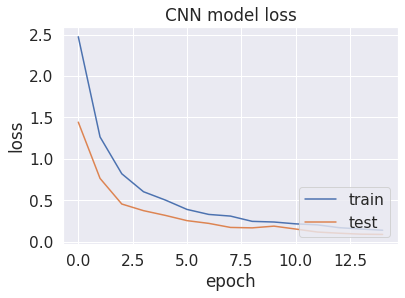

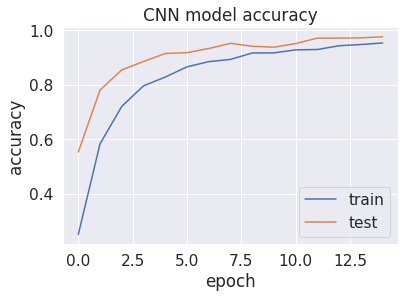

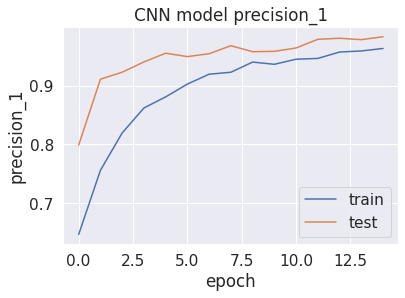

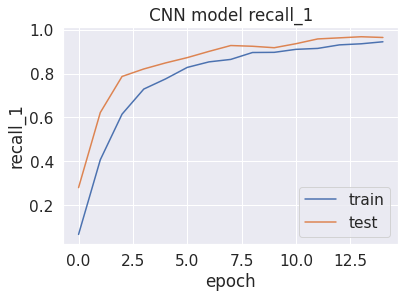

In [ ]:
my_df_cnn_history = my_df_keras_model.getHistory() # Retrieve the model training history
plot_metrics(my_df_cnn_history) # Plot the metrics

In [ ]:
my_df_k_model = my_df_keras_model.getModel() #Get the trained model
my_df_k_model.save('CNN.h5') # Save the model
#files.download('CNN.h5') # Download the model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predict_my_df = my_df_keras_model.transform(my_test_df) # Transform "my_test_df" to get the CNN predictions 

In [ ]:
argmax = udf(lambda v: float(np.argmax(v)), returnType=T.DoubleType())
predict_my_df = predict_my_df.withColumn('prediction', argmax(predict_my_df.prediction))
my_df_evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='index_label', metricName='accuracy')
print('Test accuracy:', my_df_evaluator.evaluate(predict_my_df)) # Evaluate the CNN

Test accuracy: 0.9785867237687366


In [ ]:
predict_my_df.show(50)

+--------------------+---------------+-----------+----------+
|     scaled_features|      label_vec|index_label|prediction|
+--------------------+---------------+-----------+----------+
|(784,[0,1,2,4,7,9...| (24,[2],[1.0])|        2.0|       2.0|
|(784,[0,1,2,7,9,1...|(24,[19],[1.0])|       19.0|      19.0|
|(784,[0,1,3,4,6,9...| (24,[1],[1.0])|        1.0|       1.0|
|(784,[0,1,3,5,7,8...| (24,[1],[1.0])|        1.0|       1.0|
|(784,[0,1,3,6,8,9...| (24,[5],[1.0])|        5.0|       5.0|
|(784,[0,1,3,6,9,1...| (24,[0],[1.0])|        0.0|       0.0|
|(784,[0,1,3,6,10,...|(24,[21],[1.0])|       21.0|      21.0|
|(784,[0,1,4,5,10,...|(24,[18],[1.0])|       18.0|      18.0|
|(784,[0,1,4,8,10,...|(24,[17],[1.0])|       17.0|      17.0|
|(784,[0,1,4,8,11,...|(24,[12],[1.0])|       12.0|      12.0|
|(784,[0,1,4,8,12,...|(24,[19],[1.0])|       19.0|      19.0|
|(784,[0,1,4,9,12,...|(24,[17],[1.0])|       17.0|      17.0|
|(784,[0,1,5,6,8,1...|(24,[18],[1.0])|       18.0|      18.0|
|(784,[0

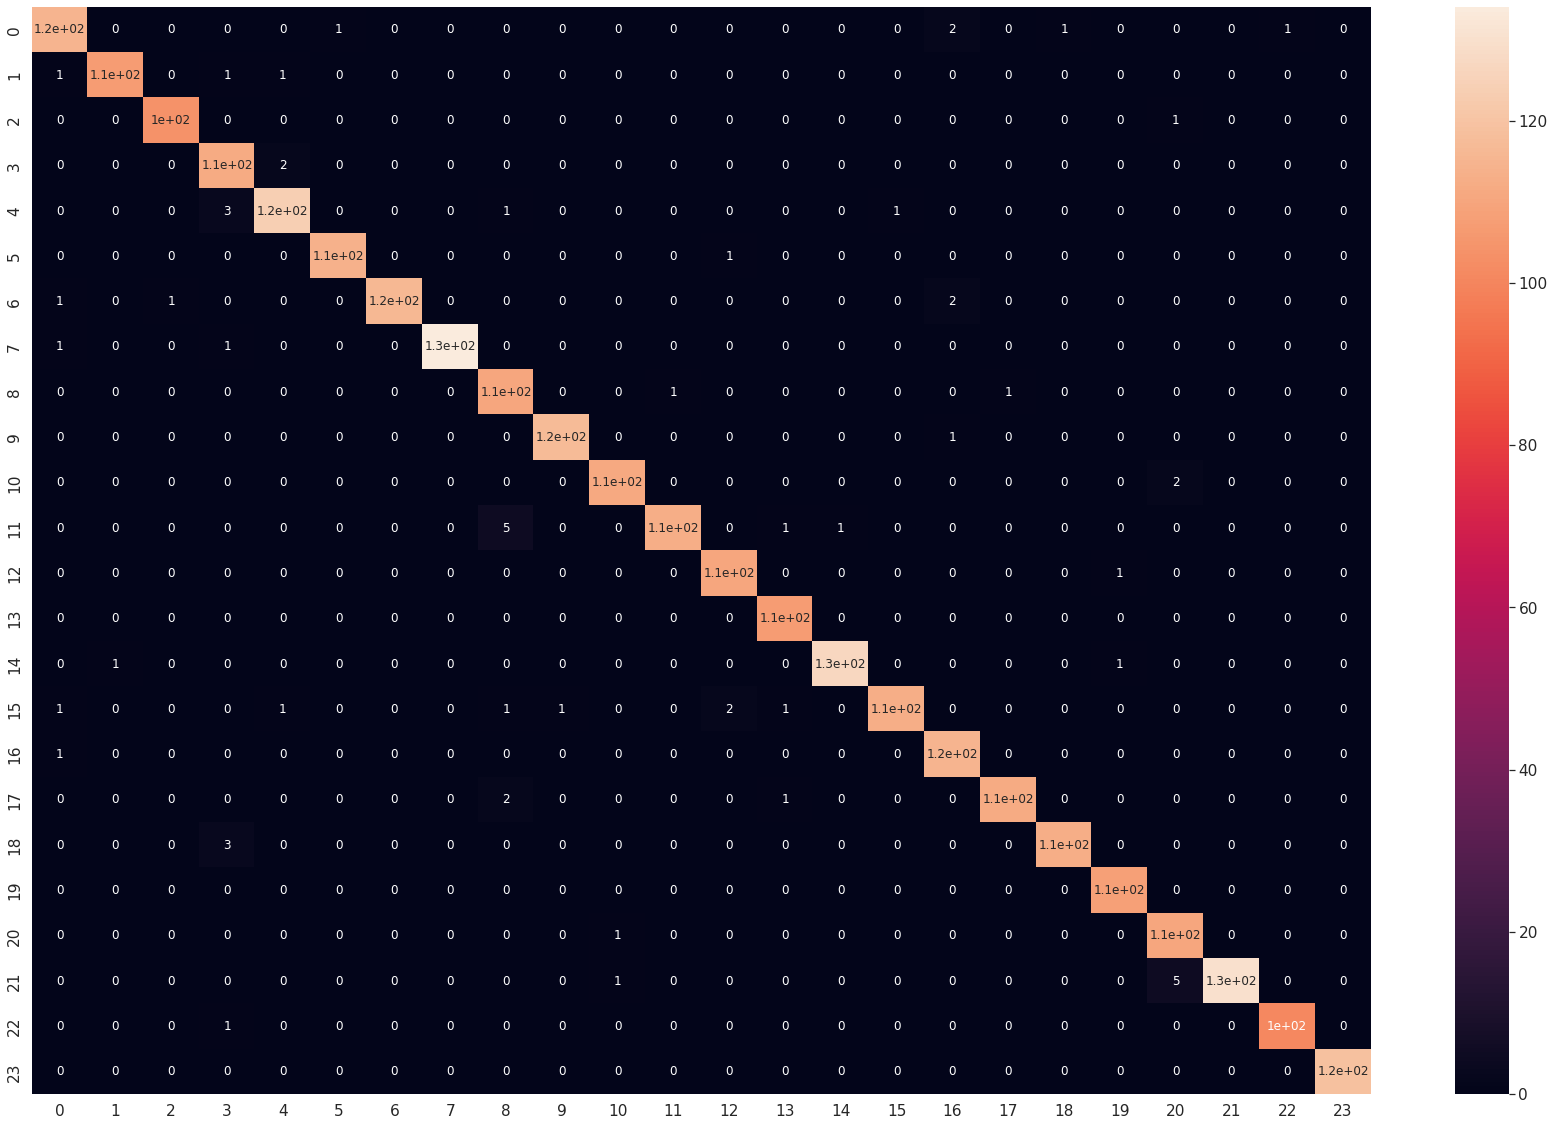

In [ ]:
df_for_confusion_matrix = predict_my_df.select(["index_label", "prediction"]) # Sample dataset with true labels and predicted labels
metrics = MulticlassMetrics(df_for_confusion_matrix.rdd) # Create MulticlassMetrics instance
cm = metrics.confusionMatrix().toArray() # Compute confusion matrix
df_cm = pd.DataFrame(cm, range(24), range(24))
plt.figure(figsize=(30,20))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show() # Plot the confusion matrix

As we can observe, the recently trained model achieves excellent performance in the testing phase, so this will be the model that I will use to make predictions in my application, which will be provided in a separate file since it needs to access the laptop's camera through the use of the OpenCV library (whose function cv2.capture(0) is not supported on Google Colab)

# Hyperparameter tuning

In this second last section, the tables related to the hyperparameter tuning are shown, which, due to limited resources, was carried out following a "try and test" strategy by manually changing the values of the hyperparameters of the different models and evaluating their performance.

<table>
  <title>
  Convolutional Neural Network (first dataset)
  </title>
  <tr>
    <th>Test_number</th>
    <th>Larning rate</th>
    <th>Kernel size of each Conv2d layer</th>
    <th>Number of channels of each Conv2d layer</th>
    <th>Dense layer nodes</th>
    <th>Dropout (last)</th>
    <th>Train accuracy</th>
    <th>Test accuracy</th>
    <th>Train recall</th>
    <th>Test recall</th>
    <th>Train precision</th>
    <th>Test precision</th>
  </tr>
  <tr>
    <td>test 1</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>64, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.96</th>
    <th>0.99</th>
    <th>0.95</th>
    <th>0.99</th>
    <th>0.97</th>
    <th>0.99</th>
  </tr>
  <tr>
    <td>test 2</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>64, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.92</th>
    <th>0.99</th>
    <th>0.91</th>
    <th>0.99</th>
    <th>0.94</th>
    <th>0.99</th>
  </tr>
  <tr>
    <td>test 3</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.92</th>
    <th>0.99</th>
    <th>0.91</th>
    <th>0.99</th>
    <th>0.94</th>
    <th>0.99</th>
  </tr>
  <tr>
    <td>test 4</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.74</th>
    <th>0.86</th>
    <th>0.61</th>
    <th>0.76</th>
    <th>0.83</th>
    <th>0.94</th>
  </tr>
   <tr>
    <td>test 5</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.97</th>
    <th>0.99</th>
    <th>0.96</th>
    <th>0.99</th>
    <th>0.97</th>
    <th>0.99</th>
  </tr>
  <tr>
    <td>test 6</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.82</th>
    <th>0.93</th>
    <th>0.74</th>
    <th>0.87</th>
    <th>0.89</th>
    <th>0.97</th>
  </tr>
  <tr>
    <td>test 7</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.98</th>
    <th>0.999</th>
    <th>0.98</th>
    <th>0.99</th>
    <th>0.98</th>
    <th>0.999</th>
  </tr>
  <tr>
    <td>test 8</td>
    <td>0.0001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.86</th>
    <th>0.97</th>
    <th>0.81</th>
    <th>0.96</th>
    <th>0.90</th>
    <th>0.98</th>
  </tr>
  <tr>
    <td>test 9 (The best)</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.99</th>
    <th>0.9999</th>
    <th>0.99</th>
    <th>0.9999</th>
    <th>0.99</th>
    <th>0.9999</th>
  </tr>
  <tr>
    <td>test 10</td>
    <td>0.0001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.91</th>
    <th>0.98</th>
    <th>0.88</th>
    <th>0.98</th>
    <th>0.93</th>
    <th>0.99</th>
  </tr>
  <tr>
    <td>test 11</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>64, 64, 64</td>
    <td>128</td>
    <td>0.5</td>
    <th>0.94</th>
    <th>0.99</th>
    <th>0.93</th>
    <th>0.99</th>
    <th>0.95</th>
    <th>0.99</th>
  </tr>
  <tr>
    <td>test 12</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.5</td>
    <th>0.989</th>
    <th>0.999</th>
    <th>0.98</th>
    <th>0.999</th>
    <th>0.989</th>
    <th>0.999</th>
  </tr>
  <tr>
    <td>test 13</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.94</th>
    <th>0.94</th>
    <th>0.92</th>
    <th>0.92</th>
    <th>0.95</th>
    <th>0.97</th>
  </tr>
   <tr>
    <td>test 14</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.69</th>
    <th>0.87</th>
    <th>0.53</th>
    <th>0.73</th>
    <th>0.82</th>
    <th>0.95</th>
  </tr>
  <tr>
    <td>test 15</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.96</th>
    <th>0.99</th>
    <th>0.95</th>
    <th>0.99</th>
    <th>0.96</th>
    <th>0.99</th>
  </tr>
   <tr>
    <td>test 16</td>
    <td>0.0001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.82</th>
    <th>0.97</th>
    <th>0.74</th>
    <th>0.95</th>
    <th>0.89</th>
    <th>0.98</th>
  </tr>
</table>



<table>
  <title>
  Random Forest Classifier (first dataset)
  </title>
  <tr>
    <th>Test_number</th>
    <th>numTrees</th>
    <th>maxDepth</th>
    <th>featureSubsetStrategy</th>
    <th>Train accuracy</th>
    <th>Test accuracy</th>
    <th>Train recall</th>
    <th>Test recall</th>
    <th>Train precision</th>
    <th>Test precision</th>
  </tr>
  <tr>
    <td>test 1</td>
    <td>20</td>
    <td>3</td>
    <td>'auto'</td>
    <th>0.36</th>
    <th>0.35</th>
    <th>0.36</th>
    <th>0.35</th>
    <th>0.36</th>
    <th>0.35</th>
  </tr>
  <tr>
    <td>test 2</td>
    <td>20</td>
    <td>4</td>
    <td>'auto'</td>
    <th>0.451</th>
    <th>0.445</th>
    <th>0.451</th>
    <th>0.445</th>
    <th>0.451</th>
    <th>0.445</th>
  </tr>
  <tr>
    <td>test 3</td>
    <td>20</td>
    <td>5</td>
    <td>'auto'</td>
    <th>0.55</th>
    <th>0.54</th>
    <th>0.55</th>
    <th>0.54</th>
    <th>0.55</th>
    <th>0.54</th>
  </tr>
  <tr>
    <td>test 4</td>
    <td>20</td>
    <td>6</td>
    <td>'auto'</td>
    <th>0.65</th>
    <th>0.64</th>
    <th>0.65</th>
    <th>0.64</th>
    <th>0.65</th>
    <th>0.64</th>
  </tr>

  <tr>
    <td>test 5</td>
    <td>20</td>
    <td>8</td>
    <td>'auto'</td>
    <th>0.86</th>
    <th>0.83</th>
    <th>0.86</th>
    <th>0.83</th>
    <th>0.86</th>
    <th>0.83</th>
  </tr>
   <tr>
    <td>test 6</td>
    <td>50</td>
    <td>3</td>
    <td>'auto'</td>
    <th>0.40</th>
    <th>0.39</th>
    <th>0.40</th>
    <th>0.39</th>
    <th>0.40</th>
    <th>0.39</th>
  </tr>
  <tr>
    <td>test 7</td>
    <td>50</td>
    <td>4</td>
    <td>'auto'</td>
    <th>0.50</th>
    <th>0.49</th>
    <th>0.50</th>
    <th>0.49</th>
    <th>0.50</th>
    <th>0.49</th>
  </tr>
  <tr>
    <td>test 8</td>
    <td>50</td>
    <td>5</td>
    <td>'auto'</td>
    <th>0.60</th>
    <th>0.59</th>
    <th>0.60</th>
    <th>0.59</th>
    <th>0.60</th>
    <th>0.59</th>
  </tr>
  <tr>
    <td>test 9</td>
    <td>50</td>
    <td>6</td>
    <td>'auto'</td>
    <th>0.71</th>
    <th>0.69</th>
    <th>0.71</th>
    <th>0.69</th>
    <th>0.71</th>
    <th>0.69</th>
  </tr>
  <tr>
    <td>test 10</td>
    <td>50</td>
    <td>8</td>
    <td>'auto'</td>
    <th>0.90</th>
    <th>0.87</th>
    <th>0.90</th>
    <th>0.87</th>
    <th>0.90</th>
    <th>0.87</th>
    
  </tr>
</table>

<table>
  <title>
  Multilayer Perceptron Classifier (first dataset)
  </title>
  <tr>
    <th>Test_number</th>
    <th>Number of nodes for each layer</th>
    <th>max_iteration</th>
    <th>Train accuracy</th>
    <th>Test accuracy</th>
    <th>Train recall</th>
    <th>Test recall</th>
    <th>Train precision</th>
    <th>Test precision</th>
  </tr>
  <tr>
    <td>test 1</td>
    <td>[784, 256, 24]</td>
    <td>100</td>
    <th>0.97</th>
    <th>0.96</th>
    <th>0.97</th>
    <th>0.96</th>
    <th>0.97</th>
    <th>0.96</th>
  </tr>
  <tr>
    <td>test 2</td>
    <td>[784, 300, 24]</td>
    <td>100</td>
    <th>0.96</th>
    <th>0.95</th>
    <th>0.96</th>
    <th>0.95</th>
    <th>0.96</th>
    <th>0.95</th>
  </tr>
  <tr>
    <td>test 3</td>
    <td>[784, 256, 128, 24]</td>
    <td>100</td>
    <th>0.84</th>
    <th>0.83</th>
    <th>0.84</th>
    <th>0.83</th>
    <th>0.84</th>
    <th>0.83</th>
  </tr>
  <tr>
    <td>test 4</td>
    <td>[784, 300, 200, 24]</td>
    <td>100</td>
    <th>0.79</th>
    <th>0.78</th>
    <th>0.79</th>
    <th>0.78</th>
    <th>0.79</th>
    <th>0.78</th>
  </tr>

  <tr>
    <td>test 5</td>
    <td>[784, 50, 40, 24]</td>
    <td>100</td>
    <th>0.727</th>
    <th>0.721</th>
    <th>0.727</th>
    <th>0.721</th>
    <th>0.727</th>
    <th>0.721</th>
  </tr>
  <tr>
    <td>test 6 (the best)</td>
    <td>[784, 40, 30,  24]</td>
    <td>100</td>
    <th>0.714</th>
    <th>0.709</th>
    <th>0.714</th>
    <th>0.709</th>
    <th>0.714</th>
    <th>0.709</th>
  </tr>  
  <tr>
    <td>test 7</td>
    <td>[784, 40, 24]</td>
    <td>100</td>
    <th>0.84</th>
    <th>0.82</th>
    <th>0.84</th>
    <th>0.82</th>
    <th>0.84</th>
    <th>0.82</th>
  </tr>
  <tr>
    <td>test 8 </td>
    <td>[784, 24, 24, 24]</td>
    <td>100</td>
    <th>0.624</th>
    <th>0.623</th>
    <th>0.624</th>
    <th>0.623</th>
    <th>0.624</th>
    <th>0.623</th>
  </tr>
  <tr>
    <td>test 9</td>
    <td>[784, 50, 30, 24]</td>
    <td>50</td>
    <th>0.5367</th>
    <th>0.5348</th>
    <th>0.5367</th>
    <th>0.5348</th>
    <th>0.5367</th>
    <th>0.5348</th>
  </tr>

  <tr>
    <td>test 10</td>
    <td>[784, 30, 30, 24]</td>
    <td>50</td>
    <th>0.437</th>
    <th>0.438</th>
    <th>0.437</th>
    <th>0.438</th>
    <th>0.437</th>
    <th>0.438</th>
  </tr>
  <tr>
    <td>test 11 (the best)</td>
    <td>[784, 24, 24, 24]</td>
    <td>50</td>
    <th>0.489</th>
    <th>0.49</th>
    <th>0.489</th>
    <th>0.49</th>
    <th>0.489</th>
    <th>0.49</th>
  </tr>
   <tr>
    <td>test 12</td>
    <td>[784, 35, 24, 24]</td>
    <td>50</td>
    <th>0.50</th>
    <th>0.497</th>
    <th>0.50</th>
    <th>0.497</th>
    <th>0.50</th>
    <th>0.497</th>
  </tr>
   <tr>
    <td>test 13</td>
    <td>[784, 50, 30, 24]</td>
    <td>50</td>
    <th>0.536</th>
    <th>0.534</th>
    <th>0.536</th>
    <th>0.534</th>
    <th>0.536</th>
    <th>0.534</th>
  </tr>
  
<table>

<table>
  <title>
  Convolutional Neural Network (my dataset)
  </title>
  <tr>
    <th>Test_number</th>
    <th>Larning rate</th>
    <th>Kernel size of each Conv2d layer</th>
    <th>Number of channels of each Conv2d layer</th>
    <th>Dense layer nodes</th>
    <th>Dropout (last)</th>
    <th>Train accuracy</th>
    <th>Test accuracy</th>
    <th>Train recall</th>
    <th>Test recall</th>
    <th>Train precision</th>
    <th>Test precision</th>
  </tr>
  <tr>
    <td>test 1 (the best)</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>64, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.89</th>
    <th>0.93</th>
    <th>0.86</th>
    <th>0.90</th>
    <th>0.92</th>
    <th>0.96</th>
  </tr>
  <tr>
    <td>test 2</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>64, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.65</th>
    <th>0.77</th>
    <th>0.50</th>
    <th>0.61</th>
    <th>0.80</th>
    <th>0.92</th>
  </tr>
  <tr>
    <td>test 3</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.88</th>
    <th>0.91</th>
    <th>0.85</th>
    <th>0.89</th>
    <th>0.92</th>
    <th>0.95</th>
  </tr>
  <tr>
    <td>test 4</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.61</th>
    <th>0.75</th>
    <th>0.44</th>
    <th>0.55</th>
    <th>0.78</th>
    <th>0.90</th>
  </tr>
   <tr>
    <td>test 5</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.91</th>
    <th>0.90</th>
    <th>0.89</th>
    <th>0.88</th>
    <th>0.94</th>
    <th>0.94</th>
  </tr>
  <tr>
    <td>test 6</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.70</th>
    <th>0.77</th>
    <th>0.56</th>
    <th>0.61</th>
    <th>0.82</th>
    <th>0.90</th>
  </tr>
  <tr>
    <td>test 7</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.94</th>
    <th>0.98</th>
    <th>0.93</th>
    <th>0.98</th>
    <th>0.95</th>
    <th>0.989</th>
  </tr>
  <tr>
    <td>test 8</td>
    <td>0.0001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.70</th>
    <th>0.86</th>
    <th>0.59</th>
    <th>0.73</th>
    <th>0.82</th>
    <th>0.94</th>
  </tr>
  <tr>
    <td>test 9 (The best)</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.96</th>
    <th>0.98</th>
    <th>0.95</th>
    <th>0.97</th>
    <th>0.97</th>
    <th>0.98</th>
  </tr>
  <tr>
    <td>test 10</td>
    <td>0.0001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>128</td>
    <td>0.2</td>
    <th>0.77</th>
    <th>0.90</th>
    <th>0.67</th>
    <th>0.80</th>
    <th>0.86</th>
    <th>0.95</th>
  </tr>
  <tr>
    <td>test 11</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>64, 64, 64</td>
    <td>128</td>
    <td>0.5</td>
    <th>0.86</th>
    <th>0.90</th>
    <th>0.81</th>
    <th>0.87</th>
    <th>0.91</th>
    <th>0.95</th>
  </tr>
  <tr>
    <td>test 12</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>128</td>
    <td>0.5</td>
    <th>0.95</th>
    <th>0.98</th>
    <th>0.93</th>
    <th>0.97</th>
    <th>0.96</th>
    <th>0.98</th>
  </tr>
  <tr>
    <td>test 13</td>
    <td>0.001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.81</th>
    <th>0.91</th>
    <th>0.74</th>
    <th>0.85</th>
    <th>0.88</th>
    <th>0.95</th>
  </tr>
   <tr>
    <td>test 14</td>
    <td>0.0001</td>
    <td>(3, 3), (3, 3), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.55</th>
    <th>0.75</th>
    <th>0.36</th>
    <th>0.50</th>
    <th>0.76</th>
    <th>0.94</th>
  </tr>
  <tr>
    <td>test 15</td>
    <td>0.001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 64</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.90</th>
    <th>0.97</th>
    <th>0.88</th>
    <th>0.95</th>
    <th>0.93</th>
    <th>0.98</th>
  </tr>
   <tr>
    <td>test 16</td>
    <td>0.0001</td>
    <td>(5, 5), (5, 5), (3, 3)</td>
    <td>32, 64, 128</td>
    <td>64</td>
    <td>0.5</td>
    <th>0.59</th>
    <th>0.81</th>
    <th>0.42</th>
    <th>0.60</th>
    <th>0.78</th>
    <th>0.94</th>
  </tr>
</table>



# Real time application

The saved model (used to evaluate how the CNN behaves in a real-time scenario) and the Python program that implements the real-time application are attached in two separate files. In addition, a video demo of the application's execution will be shown within the slides.



If you want to test the application in real time, you need to position the laptop's camera against the light. This is because the color thresholding technique works on images taking into account the various color gradations that if overly influenced by light, can lead to a decrease in model precision.